# Fitness: (Median of overheads, Median of routing costs )

## Load data


In [1]:
%matplotlib inline 
%reload_ext autoreload
from notebooks_commons import get_raw_data


# The first time we want to download the data from an index (might take a while!), 
# we should put the parameter load_from_db to True. Then, we can set it to False to 
# read the saved data from the local pickle file.
def read_data(index, load_from_db = False):
    print "\nReading from index " + index
    pair = get_raw_data(index, load_from_db)
    rtx_runs = pair[0]
    data     = pair[1] 
    return rtx_runs, data


# Here we specify the name of the index to read data from

index_random_500 = "erik-gcp-random-500cars-median" 
index_novelty_500 = "erik-gcp-novelty-500cars-median"
index_nsga2_500 = "erik-gcp-nsga2-500cars-median"
index_mlr_500 = "erik-gcp-mlr-500cars-median" 

index_random_700 = "erik-random-700cars-median" 
index_novelty_700 = "erik-noveltysearch-700cars-median"
index_nsga2_700 = "erik-nsga2-700cars-median"
index_mlr_700 = "erik-gcp-mlr-700-verify" 

index_random_800 = "erik-random-800cars-median" 
index_novelty_800 = "erik-noveltysearch-800cars-median"
index_nsga2_800 = "erik-nsga2-800cars-median"
index_mlr_800 = "erik-gcp-mlr-800-verify" 


###
load_from_db = False

### Get Novelty data
novelty_rtx_runs_500, novelty_data_500 = read_data(index_novelty_500, load_from_db)
novelty_rtx_runs_700, novelty_data_700 = read_data(index_novelty_700, load_from_db)
novelty_rtx_runs_800, novelty_data_800 = read_data(index_novelty_800, load_from_db)

### Get NSGA2 data
nsga2_rtx_runs_500, nsga2_data_500 = read_data(index_nsga2_500, load_from_db)
nsga2_rtx_runs_700, nsga2_data_700 = read_data(index_nsga2_700, load_from_db)
nsga2_rtx_runs_800, nsga2_data_800 = read_data(index_nsga2_800, load_from_db)

### Get MLR data
mlr_rtx_runs_500, mlr_data_500 = read_data(index_mlr_500, load_from_db)
mlr_rtx_runs_700, mlr_data_700 = read_data(index_mlr_700, load_from_db)
mlr_rtx_runs_800, mlr_data_800 = read_data(index_mlr_800, load_from_db)

### Get RandomSearch data
random_rtx_runs_500, random_data_500 = read_data(index_random_500, load_from_db)
random_rtx_runs_700, random_data_700 = read_data(index_random_700, load_from_db)
random_rtx_runs_800, random_data_800 = read_data(index_random_800, load_from_db)


Reading from index erik-gcp-novelty-500cars-median
data retrieved from file raw_data/erik-gcp-novelty-500cars-median.pickle

Reading from index erik-noveltysearch-700cars-median
data retrieved from file raw_data/erik-noveltysearch-700cars-median.pickle

Reading from index erik-noveltysearch-800cars-median
data retrieved from file raw_data/erik-noveltysearch-800cars-median.pickle

Reading from index erik-gcp-nsga2-500cars-median
data retrieved from file raw_data/erik-gcp-nsga2-500cars-median.pickle

Reading from index erik-nsga2-700cars-median
data retrieved from file raw_data/erik-nsga2-700cars-median.pickle

Reading from index erik-nsga2-800cars-median
data retrieved from file raw_data/erik-nsga2-800cars-median.pickle

Reading from index erik-gcp-mlr-500cars-median
data retrieved from file raw_data/erik-gcp-mlr-500cars-median.pickle

Reading from index erik-gcp-mlr-700-verify
data retrieved from file raw_data/erik-gcp-mlr-700-verify.pickle

Reading from index erik-gcp-mlr-800-verify


## Load Fitness Function

In [2]:
use_median = True

'''
Returns the fitness of an individual
'''
def get_fitness(ind):
    if use_median:
        return ind["payload"]["median_overhead"], ind["payload"]["median_routing"]
    else: 
        return ind["avg_overhead"], ind["avg_routing"]
            
'''
Returns the overhead of an individual
'''
def get_overhead(ind):
    if use_median:
        return ind["payload"]["median_overhead"]
    else:
        return ind["avg_overhead"]
    

'''
Returns the routing of an individual
'''
def get_routing(ind):
    if use_median:
        return ind["payload"]["median_routing"]
    else:
        return ind["avg_routing"]
    



def set_fitness_med(ind, overhead, routing):
    ind["payload"]["median_overhead"] = overhead
    ind["payload"]["median_routing"] = routing      

        
def set_fitness_avg(ind, overhead, routing):
    ind["avg_overhead"] = overhead
    ind["avg_routing"] = routing        

    
print("Fitness Function Loaded")

Fitness Function Loaded


## Check what's in there

In [3]:
import pprint
from IPython.display import Markdown, display

def printmd(string, color=None):
    colorstr = "<span style='color:{}'>{}</span>".format(color, string)
    display(Markdown(colorstr))
    
pp = pprint.PrettyPrinter(indent=4)

def check_data(rtx_runs, data):
    # sort according to seed 
    rtx_runs.sort(key=lambda d : d["seed"])
    opt_method = "N/A"
    if len(rtx_runs) > 0:
        try:
            opt_method = rtx_runs[0]["strategy"]["optimizer_method"]
        except:
            # mlr does not store the opt method name in field strategy.optimizer_method
            opt_method = "BOGP"
    print "There were " + str(len(rtx_runs)) + " runs performed by " + opt_method

    for rtx_run in rtx_runs:
        data_for_run = [d for d in data if d["parent"] == rtx_run["id"]]
        data_for_run.sort(key=lambda d : (d["_source"]["iteration"], d["_source"]["individual"]))
        printmd(str(len(data_for_run)) + "\t\t| seed " + str(rtx_run["seed"]) 
                + " | id " + str(rtx_run["id"]), "red")

        #for d in data_for_run:
        #    s = d["_source"]
        #    overheads = s["payload"]["overheads"]
        #    routings = s["payload"]["routings"]
        #    printmd("Iteration " + str(s["iteration"]) + ", individual " 
        #            + str(s["individual"]) + " with configuration", "blue")        
        #    pp.pprint(s["knobs"])
        #    printmd("has " + str(len(overheads)) + " overheads and " 
        #            + str(len(routings)) + " routings", "green")



# random search
check_data(random_rtx_runs_500, random_data_500)
check_data(random_rtx_runs_700, random_data_700)
check_data(random_rtx_runs_800, random_data_800)

# mlr
check_data(mlr_rtx_runs_500, mlr_data_500)
check_data(mlr_rtx_runs_700, mlr_data_700)
check_data(mlr_rtx_runs_800, mlr_data_800)

# novelty
check_data(novelty_rtx_runs_500, novelty_data_500)
check_data(novelty_rtx_runs_700, novelty_data_700)
check_data(novelty_rtx_runs_800, novelty_data_800)

# nsga2
check_data(nsga2_rtx_runs_500, nsga2_data_500)
check_data(nsga2_rtx_runs_700, nsga2_data_700)
check_data(nsga2_rtx_runs_800, nsga2_data_800)


There were 30 runs performed by RandomSearch


<span style='color:red'>100		| seed 1 | id AWiALsKlMEaT9KPSX8Ly</span>

<span style='color:red'>100		| seed 3 | id AWiALuGSMEaT9KPSX8OH</span>

<span style='color:red'>100		| seed 4 | id AWiALwiZMEaT9KPSX8Qc</span>

<span style='color:red'>100		| seed 5 | id AWiALy-aMEaT9KPSX8Sx</span>

<span style='color:red'>100		| seed 6 | id AWiAL1afMEaT9KPSX8VG</span>

<span style='color:red'>100		| seed 7 | id AWiAL33FMEaT9KPSX8Xb</span>

<span style='color:red'>100		| seed 8 | id AWiAL6TrMEaT9KPSX8Zw</span>

<span style='color:red'>100		| seed 9 | id AWiAL8vtMEaT9KPSX8cF</span>

<span style='color:red'>100		| seed 10 | id AWiAL_MSMEaT9KPSX8ea</span>

<span style='color:red'>100		| seed 11 | id AWiAMBpmMEaT9KPSX8gv</span>

<span style='color:red'>100		| seed 12 | id AWiAMEFWMEaT9KPSX8jE</span>

<span style='color:red'>100		| seed 13 | id AWiAMGipMEaT9KPSX8lZ</span>

<span style='color:red'>100		| seed 14 | id AWiAMI-zMEaT9KPSX8nw</span>

<span style='color:red'>100		| seed 15 | id AWiAMLbQMEaT9KPSX8qG</span>

<span style='color:red'>100		| seed 16 | id AWiAMHVZMEaT9KPSX8la</span>

<span style='color:red'>100		| seed 17 | id AWiAMHVjMEaT9KPSX8lb</span>

<span style='color:red'>100		| seed 18 | id AWiAMJmfMEaT9KPSX8nx</span>

<span style='color:red'>100		| seed 19 | id AWiAMMEFMEaT9KPSX8qH</span>

<span style='color:red'>100		| seed 20 | id AWiAMOfyMEaT9KPSX8sc</span>

<span style='color:red'>100		| seed 21 | id AWiAMQ8DMEaT9KPSX8ux</span>

<span style='color:red'>100		| seed 22 | id AWiAMTYQMEaT9KPSX8xG</span>

<span style='color:red'>100		| seed 23 | id AWiAMV1HMEaT9KPSX8zb</span>

<span style='color:red'>100		| seed 24 | id AWiAMYR_MEaT9KPSX81w</span>

<span style='color:red'>100		| seed 25 | id AWiAMau7MEaT9KPSX84F</span>

<span style='color:red'>100		| seed 26 | id AWiAMdLIMEaT9KPSX86a</span>

<span style='color:red'>100		| seed 27 | id AWiAMfm3MEaT9KPSX88v</span>

<span style='color:red'>100		| seed 28 | id AWiAMiFLMEaT9KPSX8_F</span>

<span style='color:red'>100		| seed 29 | id AWiAMkgJMEaT9KPSX9Bc</span>

<span style='color:red'>100		| seed 30 | id AWiAMm9HMEaT9KPSX9Dz</span>

<span style='color:red'>100		| seed 31 | id AWiDJnJcMEaT9KPSazVs</span>

There were 30 runs performed by RandomSearch


<span style='color:red'>100		| seed 1 | id AWh7MU1VMEaT9KPSTQjJ</span>

<span style='color:red'>100		| seed 3 | id AWh7MWUoMEaT9KPSTQjL</span>

<span style='color:red'>100		| seed 4 | id AWh7MYxgMEaT9KPSTQlc</span>

<span style='color:red'>100		| seed 5 | id AWh7MbONMEaT9KPSTQnt</span>

<span style='color:red'>100		| seed 6 | id AWh7MdqyMEaT9KPSTQp_</span>

<span style='color:red'>100		| seed 7 | id AWh7MgGZMEaT9KPSTQsQ</span>

<span style='color:red'>100		| seed 8 | id AWh7Mij5MEaT9KPSTQuh</span>

<span style='color:red'>100		| seed 9 | id AWh7MlAAMEaT9KPSTQwy</span>

<span style='color:red'>100		| seed 10 | id AWh7MndPMEaT9KPSTQzD</span>

<span style='color:red'>100		| seed 11 | id AWh7Mp5dMEaT9KPSTQ1U</span>

<span style='color:red'>100		| seed 12 | id AWh7MsWnMEaT9KPSTQ3l</span>

<span style='color:red'>100		| seed 13 | id AWh7Muy8MEaT9KPSTQ52</span>

<span style='color:red'>100		| seed 14 | id AWh7MxPzMEaT9KPSTQ8H</span>

<span style='color:red'>100		| seed 15 | id AWh7MzsSMEaT9KPSTQ-Y</span>

<span style='color:red'>100		| seed 16 | id AWiI4Ss8MEaT9KPSgbiv</span>

<span style='color:red'>100		| seed 17 | id AWiI4TuwMEaT9KPSgblP</span>

<span style='color:red'>100		| seed 18 | id AWiI4XZLMEaT9KPSgbnx</span>

<span style='color:red'>100		| seed 19 | id AWiI4bDfMEaT9KPSgbsx</span>

<span style='color:red'>100		| seed 20 | id AWiI4euVMEaT9KPSgbvT</span>

<span style='color:red'>100		| seed 21 | id AWiI4iX-MEaT9KPSgb0T</span>

<span style='color:red'>100		| seed 22 | id AWiI4mDRMEaT9KPSgb21</span>

<span style='color:red'>100		| seed 23 | id AWiI4pukMEaT9KPSgb71</span>

<span style='color:red'>100		| seed 24 | id AWiI4taLMEaT9KPSgb-X</span>

<span style='color:red'>100		| seed 25 | id AWiI4xFTMEaT9KPSgcDX</span>

<span style='color:red'>100		| seed 26 | id AWiI40uvMEaT9KPSgcF5</span>

<span style='color:red'>100		| seed 27 | id AWiI44ZfMEaT9KPSgcK5</span>

<span style='color:red'>100		| seed 28 | id AWiI48ESMEaT9KPSgcNb</span>

<span style='color:red'>100		| seed 29 | id AWiI4_ulMEaT9KPSgcSb</span>

<span style='color:red'>100		| seed 30 | id AWiI5DauMEaT9KPSgcU9</span>

<span style='color:red'>100		| seed 31 | id AWh9fwGqMEaT9KPSVabD</span>

There were 30 runs performed by RandomSearch


<span style='color:red'>100		| seed 1 | id AWh3AeIhMEaT9KPSPehe</span>

<span style='color:red'>100		| seed 3 | id AWh3Af6qMEaT9KPSPejq</span>

<span style='color:red'>100		| seed 4 | id AWh3AiYCMEaT9KPSPel2</span>

<span style='color:red'>100		| seed 5 | id AWh3Aky0MEaT9KPSPeoC</span>

<span style='color:red'>100		| seed 6 | id AWh3AnQOMEaT9KPSPeqO</span>

<span style='color:red'>100		| seed 7 | id AWh3AptCMEaT9KPSPesa</span>

<span style='color:red'>100		| seed 8 | id AWh3AsKaMEaT9KPSPeum</span>

<span style='color:red'>100		| seed 9 | id AWh3AumcMEaT9KPSPewy</span>

<span style='color:red'>100		| seed 10 | id AWh3AxC0MEaT9KPSPey-</span>

<span style='color:red'>100		| seed 11 | id AWh3Aze_MEaT9KPSPe1K</span>

<span style='color:red'>100		| seed 12 | id AWh3A173MEaT9KPSPe3W</span>

<span style='color:red'>100		| seed 13 | id AWh3A4Y4MEaT9KPSPe5i</span>

<span style='color:red'>100		| seed 14 | id AWh3A61PMEaT9KPSPe7u</span>

<span style='color:red'>100		| seed 15 | id AWh3A9RuMEaT9KPSPe96</span>

<span style='color:red'>100		| seed 16 | id AWiI51sFMEaT9KPSgdJd</span>

<span style='color:red'>100		| seed 17 | id AWiI52euMEaT9KPSgdJf</span>

<span style='color:red'>100		| seed 18 | id AWiI56JuMEaT9KPSgdOf</span>

<span style='color:red'>100		| seed 19 | id AWiI590bMEaT9KPSgdRB</span>

<span style='color:red'>100		| seed 20 | id AWiI6BeyMEaT9KPSgdWB</span>

<span style='color:red'>100		| seed 21 | id AWiI6FJpMEaT9KPSgdYj</span>

<span style='color:red'>100		| seed 22 | id AWiI6IzdMEaT9KPSgddj</span>

<span style='color:red'>100		| seed 23 | id AWiI6MeRMEaT9KPSgdgF</span>

<span style='color:red'>100		| seed 24 | id AWiI6QI7MEaT9KPSgdlF</span>

<span style='color:red'>100		| seed 25 | id AWiI6T0bMEaT9KPSgdnn</span>

<span style='color:red'>100		| seed 26 | id AWiI6XfLMEaT9KPSgdsn</span>

<span style='color:red'>100		| seed 27 | id AWiI6bJkMEaT9KPSgdvJ</span>

<span style='color:red'>100		| seed 28 | id AWiI6ez4MEaT9KPSgd0J</span>

<span style='color:red'>100		| seed 29 | id AWiI6ieaMEaT9KPSgd2r</span>

<span style='color:red'>100		| seed 30 | id AWiI6mJZMEaT9KPSgd7r</span>

<span style='color:red'>100		| seed 31 | id AWiI6pzpMEaT9KPSgd-N</span>

There were 30 runs performed by BOGP


<span style='color:red'>100		| seed 1 | id AWiDT-QTMEaT9KPSa9h2</span>

<span style='color:red'>100		| seed 2 | id AWiDUAqgMEaT9KPSa9kS</span>

<span style='color:red'>100		| seed 3 | id AWiDUDHKMEaT9KPSa9mu</span>

<span style='color:red'>100		| seed 4 | id AWiDUFjeMEaT9KPSa9pK</span>

<span style='color:red'>100		| seed 5 | id AWiDUH_EMEaT9KPSa9rm</span>

<span style='color:red'>100		| seed 6 | id AWiDUKb4MEaT9KPSa9uC</span>

<span style='color:red'>100		| seed 7 | id AWiDUM5BMEaT9KPSa9we</span>

<span style='color:red'>100		| seed 8 | id AWiDUPWDMEaT9KPSa9y6</span>

<span style='color:red'>100		| seed 9 | id AWiDURyPMEaT9KPSa91W</span>

<span style='color:red'>100		| seed 10 | id AWiDUUODMEaT9KPSa93y</span>

<span style='color:red'>100		| seed 11 | id AWiDUWq6MEaT9KPSa96O</span>

<span style='color:red'>100		| seed 12 | id AWiDUZHZMEaT9KPSa98q</span>

<span style='color:red'>100		| seed 13 | id AWiDUbkxMEaT9KPSa9_G</span>

<span style='color:red'>100		| seed 14 | id AWiDUeA0MEaT9KPSa-Bi</span>

<span style='color:red'>100		| seed 15 | id AWiDUgd0MEaT9KPSa-D-</span>

<span style='color:red'>100		| seed 16 | id AWiDcR4BMEaT9KPSbFyF</span>

<span style='color:red'>100		| seed 17 | id AWiDcSVdMEaT9KPSbFyG</span>

<span style='color:red'>100		| seed 18 | id AWiDcWAbMEaT9KPSbF29</span>

<span style='color:red'>100		| seed 19 | id AWiDcZqmMEaT9KPSbF5Z</span>

<span style='color:red'>100		| seed 20 | id AWiDcdVbMEaT9KPSbF-Q</span>

<span style='color:red'>100		| seed 21 | id AWiDchAHMEaT9KPSbGAs</span>

<span style='color:red'>100		| seed 22 | id AWiDckqBMEaT9KPSbGFj</span>

<span style='color:red'>100		| seed 23 | id AWiDcoVaMEaT9KPSbGH_</span>

<span style='color:red'>100		| seed 24 | id AWiDcsAQMEaT9KPSbGM2</span>

<span style='color:red'>100		| seed 25 | id AWiDcvq_MEaT9KPSbGPS</span>

<span style='color:red'>100		| seed 26 | id AWiDczWHMEaT9KPSbGUJ</span>

<span style='color:red'>100		| seed 27 | id AWiDc3AAMEaT9KPSbGWl</span>

<span style='color:red'>100		| seed 28 | id AWiDc6qsMEaT9KPSbGbc</span>

<span style='color:red'>100		| seed 29 | id AWiDc-WOMEaT9KPSbGd4</span>

<span style='color:red'>100		| seed 30 | id AWiDdCAUMEaT9KPSbGiv</span>

There were 30 runs performed by BOGP


<span style='color:red'>100		| seed 1 | id AWiGrv0GMEaT9KPSeNh8</span>

<span style='color:red'>100		| seed 2 | id AWiGrxCPMEaT9KPSeNkb</span>

<span style='color:red'>100		| seed 3 | id AWiGryQXMEaT9KPSeNkc</span>

<span style='color:red'>100		| seed 4 | id AWiGrzfyMEaT9KPSeNm7</span>

<span style='color:red'>100		| seed 5 | id AWiGr0tkMEaT9KPSeNm8</span>

<span style='color:red'>100		| seed 6 | id AWiGr17oMEaT9KPSeNpb</span>

<span style='color:red'>100		| seed 7 | id AWiGr3J5MEaT9KPSeNpc</span>

<span style='color:red'>100		| seed 8 | id AWiGr4YtMEaT9KPSeNr7</span>

<span style='color:red'>100		| seed 9 | id AWiGr5nJMEaT9KPSeNr8</span>

<span style='color:red'>100		| seed 10 | id AWiGr61LMEaT9KPSeNub</span>

<span style='color:red'>100		| seed 11 | id AWiGr8FIMEaT9KPSeNuc</span>

<span style='color:red'>100		| seed 12 | id AWiGr9SuMEaT9KPSeNw7</span>

<span style='color:red'>100		| seed 13 | id AWiGr-giMEaT9KPSeNw8</span>

<span style='color:red'>100		| seed 14 | id AWiGr_vzMEaT9KPSeNzb</span>

<span style='color:red'>100		| seed 15 | id AWiGsA9uMEaT9KPSeNzc</span>

<span style='color:red'>100		| seed 16 | id AWiPwLKRMEaT9KPSnnRq</span>

<span style='color:red'>100		| seed 17 | id AWiPwL7nMEaT9KPSnnRr</span>

<span style='color:red'>100		| seed 18 | id AWiPwPmjMEaT9KPSnnXC</span>

<span style='color:red'>100		| seed 19 | id AWiPwTQQMEaT9KPSnnZu</span>

<span style='color:red'>100		| seed 20 | id AWiPwW67MEaT9KPSnnfF</span>

<span style='color:red'>100		| seed 21 | id AWiPwalpMEaT9KPSnnhx</span>

<span style='color:red'>100		| seed 22 | id AWiPwePgMEaT9KPSnnnI</span>

<span style='color:red'>100		| seed 23 | id AWiPwh6eMEaT9KPSnnp0</span>

<span style='color:red'>100		| seed 24 | id AWiPwll1MEaT9KPSnnvL</span>

<span style='color:red'>100		| seed 25 | id AWiPwpQiMEaT9KPSnnx3</span>

<span style='color:red'>100		| seed 26 | id AWiPws7FMEaT9KPSnn3O</span>

<span style='color:red'>100		| seed 27 | id AWiPwwmaMEaT9KPSnn56</span>

<span style='color:red'>100		| seed 28 | id AWiPw0QRMEaT9KPSnn_R</span>

<span style='color:red'>100		| seed 29 | id AWiPw36tMEaT9KPSnoB9</span>

<span style='color:red'>100		| seed 30 | id AWiPw7l8MEaT9KPSnoHU</span>

There were 30 runs performed by BOGP


<span style='color:red'>100		| seed 1 | id AWiPw8d-MEaT9KPSnoHV</span>

<span style='color:red'>100		| seed 2 | id AWiPw9GsMEaT9KPSnoKC</span>

<span style='color:red'>100		| seed 3 | id AWiPxAxeMEaT9KPSnoMv</span>

<span style='color:red'>100		| seed 4 | id AWiPxEcXMEaT9KPSnoSI</span>

<span style='color:red'>100		| seed 5 | id AWiPxIHJMEaT9KPSnoU1</span>

<span style='color:red'>100		| seed 6 | id AWiPxLxZMEaT9KPSnoaO</span>

<span style='color:red'>100		| seed 7 | id AWiPxPb9MEaT9KPSnoc7</span>

<span style='color:red'>100		| seed 8 | id AWiPxTF3MEaT9KPSnoiU</span>

<span style='color:red'>100		| seed 9 | id AWiPxWxXMEaT9KPSnolB</span>

<span style='color:red'>100		| seed 10 | id AWiPxacAMEaT9KPSnoqa</span>

<span style='color:red'>100		| seed 11 | id AWiPxeG7MEaT9KPSnotH</span>

<span style='color:red'>100		| seed 12 | id AWiPxhxwMEaT9KPSnoyg</span>

<span style='color:red'>100		| seed 13 | id AWiPxldKMEaT9KPSno1N</span>

<span style='color:red'>100		| seed 14 | id AWiPxpH2MEaT9KPSno6m</span>

<span style='color:red'>100		| seed 15 | id AWiPxswvMEaT9KPSno9T</span>

<span style='color:red'>100		| seed 16 | id AWiPyoAGMEaT9KPSnp90</span>

<span style='color:red'>100		| seed 17 | id AWiPypBJMEaT9KPSnqAh</span>

<span style='color:red'>100		| seed 18 | id AWiPysrMMEaT9KPSnqDO</span>

<span style='color:red'>100		| seed 19 | id AWiPywV1MEaT9KPSnqIn</span>

<span style='color:red'>100		| seed 20 | id AWiPyz_4MEaT9KPSnqLU</span>

<span style='color:red'>100		| seed 21 | id AWiPy3qmMEaT9KPSnqQt</span>

<span style='color:red'>100		| seed 22 | id AWiPy7UjMEaT9KPSnqTa</span>

<span style='color:red'>100		| seed 23 | id AWiPy_AHMEaT9KPSnqYz</span>

<span style='color:red'>100		| seed 24 | id AWiPzCrPMEaT9KPSnqbg</span>

<span style='color:red'>100		| seed 25 | id AWiPzGVOMEaT9KPSnqg5</span>

<span style='color:red'>100		| seed 26 | id AWiPzKAOMEaT9KPSnqjm</span>

<span style='color:red'>100		| seed 27 | id AWiPzNq9MEaT9KPSnqo_</span>

<span style='color:red'>100		| seed 28 | id AWiPzRV1MEaT9KPSnqrs</span>

<span style='color:red'>100		| seed 29 | id AWiPzVAVMEaT9KPSnqxF</span>

<span style='color:red'>100		| seed 30 | id AWiPzYr_MEaT9KPSnqzy</span>

There were 30 runs performed by NoveltySearch


<span style='color:red'>100		| seed 1 | id AWiBO2cTMEaT9KPSY8Tc</span>

<span style='color:red'>100		| seed 2 | id AWiBO3mbMEaT9KPSY8Te</span>

<span style='color:red'>100		| seed 3 | id AWiBO40hMEaT9KPSY8V1</span>

<span style='color:red'>100		| seed 4 | id AWiBO6CoMEaT9KPSY8V3</span>

<span style='color:red'>100		| seed 5 | id AWiBO7RjMEaT9KPSY8YO</span>

<span style='color:red'>100		| seed 6 | id AWiBO8fmMEaT9KPSY8YQ</span>

<span style='color:red'>100		| seed 7 | id AWiBO9uWMEaT9KPSY8an</span>

<span style='color:red'>100		| seed 8 | id AWiBO-8IMEaT9KPSY8ap</span>

<span style='color:red'>100		| seed 9 | id AWiBPALRMEaT9KPSY8dA</span>

<span style='color:red'>100		| seed 10 | id AWiBPBZuMEaT9KPSY8dC</span>

<span style='color:red'>100		| seed 11 | id AWiBPCpdMEaT9KPSY8fZ</span>

<span style='color:red'>100		| seed 12 | id AWiBPD3dMEaT9KPSY8fb</span>

<span style='color:red'>100		| seed 13 | id AWiBPFE1MEaT9KPSY8hy</span>

<span style='color:red'>100		| seed 14 | id AWiBPGTAMEaT9KPSY8h0</span>

<span style='color:red'>100		| seed 15 | id AWiBPHh6MEaT9KPSY8kL</span>

<span style='color:red'>100		| seed 16 | id AWiBSgcrMEaT9KPSY_2M</span>

<span style='color:red'>100		| seed 17 | id AWiBShrOMEaT9KPSY_2O</span>

<span style='color:red'>100		| seed 18 | id AWiBSi4hMEaT9KPSY_4l</span>

<span style='color:red'>100		| seed 19 | id AWiBSkHuMEaT9KPSY_4n</span>

<span style='color:red'>100		| seed 20 | id AWiBSlVRMEaT9KPSY_6-</span>

<span style='color:red'>100		| seed 21 | id AWiBSmkhMEaT9KPSY_7A</span>

<span style='color:red'>100		| seed 22 | id AWiBSnydMEaT9KPSY_9X</span>

<span style='color:red'>100		| seed 23 | id AWiBSpCBMEaT9KPSY_9Z</span>

<span style='color:red'>100		| seed 24 | id AWiBSqPVMEaT9KPSY__w</span>

<span style='color:red'>100		| seed 25 | id AWiBSrfFMEaT9KPSY__y</span>

<span style='color:red'>100		| seed 26 | id AWiBSssqMEaT9KPSZACJ</span>

<span style='color:red'>100		| seed 27 | id AWiBSt7DMEaT9KPSZACL</span>

<span style='color:red'>100		| seed 28 | id AWiBSvKHMEaT9KPSZAEi</span>

<span style='color:red'>100		| seed 29 | id AWiBSwYUMEaT9KPSZAEk</span>

<span style='color:red'>100		| seed 30 | id AWiBSxm8MEaT9KPSZAG7</span>

There were 30 runs performed by NoveltySearch


<span style='color:red'>100		| seed 1 | id AWh7NW7lMEaT9KPSTRgi</span>

<span style='color:red'>100		| seed 2 | id AWh7NXJEMEaT9KPSTRgk</span>

<span style='color:red'>100		| seed 3 | id AWh7NZlOMEaT9KPSTRi4</span>

<span style='color:red'>100		| seed 4 | id AWh7NcB4MEaT9KPSTRlL</span>

<span style='color:red'>100		| seed 5 | id AWh7NedyMEaT9KPSTRne</span>

<span style='color:red'>100		| seed 6 | id AWh7Ng64MEaT9KPSTRpx</span>

<span style='color:red'>100		| seed 7 | id AWh7NjXjMEaT9KPSTRsE</span>

<span style='color:red'>100		| seed 8 | id AWh7Nl0oMEaT9KPSTRuX</span>

<span style='color:red'>100		| seed 9 | id AWh7NoRRMEaT9KPSTRwq</span>

<span style='color:red'>100		| seed 10 | id AWh7NqtaMEaT9KPSTRy9</span>

<span style='color:red'>100		| seed 11 | id AWh7NtJvMEaT9KPSTR1Q</span>

<span style='color:red'>100		| seed 12 | id AWh7Nvm4MEaT9KPSTR3j</span>

<span style='color:red'>100		| seed 13 | id AWh7NyC5MEaT9KPSTR52</span>

<span style='color:red'>100		| seed 14 | id AWh7N0feMEaT9KPSTR8J</span>

<span style='color:red'>100		| seed 15 | id AWh7N28vMEaT9KPSTR-c</span>

<span style='color:red'>100		| seed 16 | id AWiF7DYLMEaT9KPSdjiz</span>

<span style='color:red'>100		| seed 17 | id AWiF7DYKMEaT9KPSdjiy</span>

<span style='color:red'>100		| seed 18 | id AWiF7FKNMEaT9KPSdjlP</span>

<span style='color:red'>100		| seed 19 | id AWiF7Hm9MEaT9KPSdjns</span>

<span style='color:red'>100		| seed 20 | id AWiF7KDkMEaT9KPSdjqJ</span>

<span style='color:red'>100		| seed 21 | id AWiF7MfjMEaT9KPSdjsm</span>

<span style='color:red'>100		| seed 22 | id AWiF7O76MEaT9KPSdjvD</span>

<span style='color:red'>100		| seed 23 | id AWiF7RXyMEaT9KPSdjxg</span>

<span style='color:red'>100		| seed 24 | id AWiF7T0bMEaT9KPSdjz9</span>

<span style='color:red'>100		| seed 25 | id AWiF7WSGMEaT9KPSdj2a</span>

<span style='color:red'>100		| seed 26 | id AWiF7YvLMEaT9KPSdj43</span>

<span style='color:red'>100		| seed 27 | id AWiF7bLeMEaT9KPSdj7U</span>

<span style='color:red'>100		| seed 28 | id AWiF7dnwMEaT9KPSdj9x</span>

<span style='color:red'>100		| seed 29 | id AWiF7gEQMEaT9KPSdkAO</span>

<span style='color:red'>100		| seed 30 | id AWiF7ig4MEaT9KPSdkCr</span>

There were 30 runs performed by NoveltySearch


<span style='color:red'>100		| seed 1 | id AWh2_TDsMEaT9KPSPdeZ</span>

<span style='color:red'>100		| seed 2 | id AWh2_TNfMEaT9KPSPdea</span>

<span style='color:red'>100		| seed 3 | id AWh2_VqXMEaT9KPSPdgl</span>

<span style='color:red'>100		| seed 4 | id AWh2_YG3MEaT9KPSPdiw</span>

<span style='color:red'>100		| seed 5 | id AWh2_ajjMEaT9KPSPdk7</span>

<span style='color:red'>100		| seed 6 | id AWh2_dAeMEaT9KPSPdnG</span>

<span style='color:red'>100		| seed 7 | id AWh2_fcoMEaT9KPSPdpR</span>

<span style='color:red'>100		| seed 8 | id AWh2_h5MMEaT9KPSPdrc</span>

<span style='color:red'>100		| seed 9 | id AWh2_kWWMEaT9KPSPdtn</span>

<span style='color:red'>100		| seed 10 | id AWh2_mzQMEaT9KPSPdvy</span>

<span style='color:red'>100		| seed 11 | id AWh2_pPHMEaT9KPSPdx9</span>

<span style='color:red'>100		| seed 12 | id AWh2_rsSMEaT9KPSPd0I</span>

<span style='color:red'>100		| seed 13 | id AWh2_uIUMEaT9KPSPd2T</span>

<span style='color:red'>100		| seed 14 | id AWh2_wkzMEaT9KPSPd4e</span>

<span style='color:red'>100		| seed 15 | id AWh2_zB_MEaT9KPSPd6p</span>

<span style='color:red'>100		| seed 16 | id AWiF75q5MEaT9KPSdkYp</span>

<span style='color:red'>100		| seed 17 | id AWiF76SrMEaT9KPSdkYq</span>

<span style='color:red'>100		| seed 18 | id AWiF799vMEaT9KPSdkdj</span>

<span style='color:red'>100		| seed 19 | id AWiF8BovMEaT9KPSdkgA</span>

<span style='color:red'>100		| seed 20 | id AWiF8FRnMEaT9KPSdkk5</span>

<span style='color:red'>100		| seed 21 | id AWiF8I9jMEaT9KPSdknW</span>

<span style='color:red'>100		| seed 22 | id AWiF8MoTMEaT9KPSdksP</span>

<span style='color:red'>100		| seed 23 | id AWiF8QSkMEaT9KPSdkus</span>

<span style='color:red'>100		| seed 24 | id AWiF8T-IMEaT9KPSdkzl</span>

<span style='color:red'>100		| seed 25 | id AWiF8XoNMEaT9KPSdk2C</span>

<span style='color:red'>100		| seed 26 | id AWiF8bSuMEaT9KPSdk67</span>

<span style='color:red'>100		| seed 27 | id AWiF8e97MEaT9KPSdk9Y</span>

<span style='color:red'>100		| seed 28 | id AWiF8in8MEaT9KPSdlCR</span>

<span style='color:red'>100		| seed 29 | id AWiF8mSqMEaT9KPSdlEu</span>

<span style='color:red'>100		| seed 30 | id AWiF8p95MEaT9KPSdlJn</span>

There were 30 runs performed by NSGAII


<span style='color:red'>100		| seed 2 | id AWiAMheKMEaT9KPSX8_E</span>

<span style='color:red'>100		| seed 3 | id AWiAMjobMEaT9KPSX9Bb</span>

<span style='color:red'>100		| seed 4 | id AWiAMmELMEaT9KPSX9Dy</span>

<span style='color:red'>100		| seed 5 | id AWiAMogrMEaT9KPSX9GJ</span>

<span style='color:red'>100		| seed 6 | id AWiAMq90MEaT9KPSX9If</span>

<span style='color:red'>100		| seed 7 | id AWiAMtY-MEaT9KPSX9K1</span>

<span style='color:red'>100		| seed 8 | id AWiAMv2NMEaT9KPSX9NL</span>

<span style='color:red'>100		| seed 9 | id AWiAMyTBMEaT9KPSX9Ph</span>

<span style='color:red'>100		| seed 10 | id AWiAM0vMMEaT9KPSX9R3</span>

<span style='color:red'>100		| seed 11 | id AWiAM3MUMEaT9KPSX9UN</span>

<span style='color:red'>100		| seed 12 | id AWiAM5oFMEaT9KPSX9Wj</span>

<span style='color:red'>100		| seed 13 | id AWiAM8FgMEaT9KPSX9Y5</span>

<span style='color:red'>100		| seed 14 | id AWiAM-hyMEaT9KPSX9bP</span>

<span style='color:red'>100		| seed 15 | id AWiANA-TMEaT9KPSX9dl</span>

<span style='color:red'>100		| seed 16 | id AWiBI_mwMEaT9KPSY2qS</span>

<span style='color:red'>100		| seed 17 | id AWiBJDQzMEaT9KPSY2u-</span>

<span style='color:red'>100		| seed 18 | id AWiBJG66MEaT9KPSY2xW</span>

<span style='color:red'>100		| seed 19 | id AWiBJKlbMEaT9KPSY22C</span>

<span style='color:red'>100		| seed 20 | id AWiBJOQNMEaT9KPSY24a</span>

<span style='color:red'>100		| seed 21 | id AWiBJR6wMEaT9KPSY29G</span>

<span style='color:red'>100		| seed 22 | id AWiBJVk8MEaT9KPSY2_e</span>

<span style='color:red'>100		| seed 23 | id AWiBJZPiMEaT9KPSY3EK</span>

<span style='color:red'>100		| seed 24 | id AWiBJc63MEaT9KPSY3Gi</span>

<span style='color:red'>100		| seed 25 | id AWiBJglfMEaT9KPSY3LO</span>

<span style='color:red'>100		| seed 26 | id AWiBJkPuMEaT9KPSY3Nm</span>

<span style='color:red'>100		| seed 27 | id AWiBJn6tMEaT9KPSY3SS</span>

<span style='color:red'>100		| seed 28 | id AWiBJrlkMEaT9KPSY3Uq</span>

<span style='color:red'>100		| seed 29 | id AWiBJvQbMEaT9KPSY3ZW</span>

<span style='color:red'>100		| seed 30 | id AWiBJy7KMEaT9KPSY3bu</span>

<span style='color:red'>100		| seed 31 | id AWiBy5I9MEaT9KPSZfJz</span>

There were 30 runs performed by NSGAII


<span style='color:red'>100		| seed 2 | id AWh7M4caMEaT9KPSTRC5</span>

<span style='color:red'>100		| seed 3 | id AWh7M51lMEaT9KPSTRFL</span>

<span style='color:red'>100		| seed 4 | id AWh7M8SXMEaT9KPSTRHd</span>

<span style='color:red'>100		| seed 5 | id AWh7M-ubMEaT9KPSTRJv</span>

<span style='color:red'>100		| seed 6 | id AWh7NBKIMEaT9KPSTRMB</span>

<span style='color:red'>100		| seed 7 | id AWh7NDnwMEaT9KPSTROT</span>

<span style='color:red'>100		| seed 8 | id AWh7NGDiMEaT9KPSTRQl</span>

<span style='color:red'>100		| seed 9 | id AWh7NIgIMEaT9KPSTRS3</span>

<span style='color:red'>100		| seed 10 | id AWh7NK9SMEaT9KPSTRVJ</span>

<span style='color:red'>100		| seed 11 | id AWh7NNZ0MEaT9KPSTRXb</span>

<span style='color:red'>100		| seed 12 | id AWh7NP2TMEaT9KPSTRZt</span>

<span style='color:red'>100		| seed 13 | id AWh7NSS8MEaT9KPSTRb_</span>

<span style='color:red'>100		| seed 14 | id AWh7NUu8MEaT9KPSTReR</span>

<span style='color:red'>100		| seed 15 | id AWh7NXLyMEaT9KPSTRgl</span>

<span style='color:red'>100		| seed 16 | id AWiF8rjrMEaT9KPSdlJo</span>

<span style='color:red'>100		| seed 17 | id AWiF8saAMEaT9KPSdlMF</span>

<span style='color:red'>100		| seed 18 | id AWiF8wE6MEaT9KPSdlOi</span>

<span style='color:red'>100		| seed 19 | id AWiF8zwhMEaT9KPSdlTb</span>

<span style='color:red'>100		| seed 20 | id AWiF83ZeMEaT9KPSdlV4</span>

<span style='color:red'>100		| seed 21 | id AWiF87EyMEaT9KPSdlax</span>

<span style='color:red'>100		| seed 22 | id AWiF8-veMEaT9KPSdldO</span>

<span style='color:red'>100		| seed 23 | id AWiF9CZhMEaT9KPSdliH</span>

<span style='color:red'>100		| seed 24 | id AWiF9GE_MEaT9KPSdlkk</span>

<span style='color:red'>100		| seed 25 | id AWiF9JvLMEaT9KPSdlpd</span>

<span style='color:red'>100		| seed 26 | id AWiF9NZnMEaT9KPSdlr6</span>

<span style='color:red'>100		| seed 27 | id AWiF9RFYMEaT9KPSdlwz</span>

<span style='color:red'>100		| seed 28 | id AWiF9UvYMEaT9KPSdlzQ</span>

<span style='color:red'>100		| seed 29 | id AWiF9YaQMEaT9KPSdl4K</span>

<span style='color:red'>100		| seed 30 | id AWiF9cFAMEaT9KPSdl6o</span>

<span style='color:red'>100		| seed 31 | id AWh9DmurMEaT9KPSVAAr</span>

There were 30 runs performed by NSGAII


<span style='color:red'>100		| seed 2 | id AWh2-DsKMEaT9KPSPcZr</span>

<span style='color:red'>100		| seed 3 | id AWh2-FhqMEaT9KPSPcb0</span>

<span style='color:red'>100		| seed 4 | id AWh2-H9qMEaT9KPSPcb2</span>

<span style='color:red'>100		| seed 5 | id AWh2-KaxMEaT9KPSPcgI</span>

<span style='color:red'>100		| seed 6 | id AWh2-M3DMEaT9KPSPciS</span>

<span style='color:red'>100		| seed 7 | id AWh2-PTpMEaT9KPSPckc</span>

<span style='color:red'>100		| seed 8 | id AWh2-RweMEaT9KPSPcmm</span>

<span style='color:red'>100		| seed 9 | id AWh2-UNSMEaT9KPSPcow</span>

<span style='color:red'>100		| seed 10 | id AWh2-WpeMEaT9KPSPcq6</span>

<span style='color:red'>100		| seed 11 | id AWh2-ZF-MEaT9KPSPctE</span>

<span style='color:red'>100		| seed 12 | id AWh2-bi0MEaT9KPSPcvO</span>

<span style='color:red'>100		| seed 13 | id AWh2-d-gMEaT9KPSPcxY</span>

<span style='color:red'>100		| seed 14 | id AWh2-gb-MEaT9KPSPczi</span>

<span style='color:red'>100		| seed 15 | id AWh2-i4kMEaT9KPSPc1t</span>

<span style='color:red'>100		| seed 16 | id AWiF9XyAMEaT9KPSdl4I</span>

<span style='color:red'>100		| seed 17 | id AWiF9YtAMEaT9KPSdl4L</span>

<span style='color:red'>100		| seed 18 | id AWiF9cXgMEaT9KPSdl6p</span>

<span style='color:red'>100		| seed 19 | id AWiF9gBhMEaT9KPSdl_i</span>

<span style='color:red'>100		| seed 20 | id AWiF9jsOMEaT9KPSdmB_</span>

<span style='color:red'>100		| seed 21 | id AWiF9nWWMEaT9KPSdmG4</span>

<span style='color:red'>100		| seed 22 | id AWiF9rA6MEaT9KPSdmJV</span>

<span style='color:red'>100		| seed 23 | id AWiF9usCMEaT9KPSdmOO</span>

<span style='color:red'>100		| seed 24 | id AWiF9yWbMEaT9KPSdmQr</span>

<span style='color:red'>100		| seed 25 | id AWiF92BMMEaT9KPSdmVk</span>

<span style='color:red'>100		| seed 26 | id AWiF95soMEaT9KPSdmYB</span>

<span style='color:red'>100		| seed 27 | id AWiF99W0MEaT9KPSdmc6</span>

<span style='color:red'>100		| seed 28 | id AWiF-BBhMEaT9KPSdmfX</span>

<span style='color:red'>100		| seed 29 | id AWiF-Er5MEaT9KPSdmkQ</span>

<span style='color:red'>100		| seed 30 | id AWiF-IXEMEaT9KPSdmmt</span>

<span style='color:red'>100		| seed 31 | id AWh5Q1sdMEaT9KPSRgTy</span>

## Code for computing the hypervolume

In [4]:
#    https://ls11-www.cs.tu-dortmund.de/rudolph/hypervolume/start

#    Copyright (C) 2010 Simon Wessing
#    TU Dortmund University
#
#    This program is free software: you can redistribute it and/or modify
#    it under the terms of the GNU General Public License as published by
#    the Free Software Foundation, either version 3 of the License, or
#    (at your option) any later version.
#
#    This program is distributed in the hope that it will be useful,
#    but WITHOUT ANY WARRANTY; without even the implied warranty of
#    MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
#    GNU General Public License for more details.
#
#    You should have received a copy of the GNU General Public License
#    along with this program.  If not, see <http://www.gnu.org/licenses/>.


__author__ = "Simon Wessing"


class HyperVolume:
    """
    Hypervolume computation based on variant 3 of the algorithm in the paper:
    C. M. Fonseca, L. Paquete, and M. Lopez-Ibanez. An improved dimension-sweep
    algorithm for the hypervolume indicator. In IEEE Congress on Evolutionary
    Computation, pages 1157-1163, Vancouver, Canada, July 2006.

    Minimization is implicitly assumed here!

    """

    def __init__(self, referencePoint):
        """Constructor."""
        self.referencePoint = referencePoint
        self.list = []


    def compute(self, front):
        """Returns the hypervolume that is dominated by a non-dominated front.

        Before the HV computation, front and reference point are translated, so
        that the reference point is [0, ..., 0].

        """

        def weaklyDominates(point, other):
            for i in xrange(len(point)):
                if point[i] > other[i]:
                    return False
            return True

        relevantPoints = []
        referencePoint = self.referencePoint
        dimensions = len(referencePoint)
        for point in front:
            # only consider points that dominate the reference point
            if weaklyDominates(point, referencePoint):
                relevantPoints.append(point)
        if any(referencePoint):
            # shift points so that referencePoint == [0, ..., 0]
            # this way the reference point doesn't have to be explicitly used
            # in the HV computation
            for j in xrange(len(relevantPoints)):
                relevantPoints[j] = [relevantPoints[j][i] - referencePoint[i] for i in xrange(dimensions)]
        self.preProcess(relevantPoints)
        bounds = [-1.0e308] * dimensions
        hyperVolume = self.hvRecursive(dimensions - 1, len(relevantPoints), bounds)
        return hyperVolume


    def hvRecursive(self, dimIndex, length, bounds):
        """Recursive call to hypervolume calculation.

        In contrast to the paper, the code assumes that the reference point
        is [0, ..., 0]. This allows the avoidance of a few operations.

        """
        hvol = 0.0
        sentinel = self.list.sentinel
        if length == 0:
            return hvol
        elif dimIndex == 0:
            # special case: only one dimension
            # why using hypervolume at all?
            return -sentinel.next[0].cargo[0]
        elif dimIndex == 1:
            # special case: two dimensions, end recursion
            q = sentinel.next[1]
            h = q.cargo[0]
            p = q.next[1]
            while p is not sentinel:
                pCargo = p.cargo
                hvol += h * (q.cargo[1] - pCargo[1])
                if pCargo[0] < h:
                    h = pCargo[0]
                q = p
                p = q.next[1]
            hvol += h * q.cargo[1]
            return hvol
        else:
            remove = self.list.remove
            reinsert = self.list.reinsert
            hvRecursive = self.hvRecursive
            p = sentinel
            q = p.prev[dimIndex]
            while q.cargo != None:
                if q.ignore < dimIndex:
                    q.ignore = 0
                q = q.prev[dimIndex]
            q = p.prev[dimIndex]
            while length > 1 and (q.cargo[dimIndex] > bounds[dimIndex] or q.prev[dimIndex].cargo[dimIndex] >= bounds[dimIndex]):
                p = q
                remove(p, dimIndex, bounds)
                q = p.prev[dimIndex]
                length -= 1
            qArea = q.area
            qCargo = q.cargo
            qPrevDimIndex = q.prev[dimIndex]
            if length > 1:
                hvol = qPrevDimIndex.volume[dimIndex] + qPrevDimIndex.area[dimIndex] * (qCargo[dimIndex] - qPrevDimIndex.cargo[dimIndex])
            else:
                qArea[0] = 1
                qArea[1:dimIndex+1] = [qArea[i] * -qCargo[i] for i in xrange(dimIndex)]
            q.volume[dimIndex] = hvol
            if q.ignore >= dimIndex:
                qArea[dimIndex] = qPrevDimIndex.area[dimIndex]
            else:
                qArea[dimIndex] = hvRecursive(dimIndex - 1, length, bounds)
                if qArea[dimIndex] <= qPrevDimIndex.area[dimIndex]:
                    q.ignore = dimIndex
            while p is not sentinel:
                pCargoDimIndex = p.cargo[dimIndex]
                hvol += q.area[dimIndex] * (pCargoDimIndex - q.cargo[dimIndex])
                bounds[dimIndex] = pCargoDimIndex
                reinsert(p, dimIndex, bounds)
                length += 1
                q = p
                p = p.next[dimIndex]
                q.volume[dimIndex] = hvol
                if q.ignore >= dimIndex:
                    q.area[dimIndex] = q.prev[dimIndex].area[dimIndex]
                else:
                    q.area[dimIndex] = hvRecursive(dimIndex - 1, length, bounds)
                    if q.area[dimIndex] <= q.prev[dimIndex].area[dimIndex]:
                        q.ignore = dimIndex
            hvol -= q.area[dimIndex] * q.cargo[dimIndex]
            return hvol


    def preProcess(self, front):
        """Sets up the list data structure needed for calculation."""
        dimensions = len(self.referencePoint)
        nodeList = MultiList(dimensions)
        nodes = [MultiList.Node(dimensions, point) for point in front]
        for i in xrange(dimensions):
            self.sortByDimension(nodes, i)
            nodeList.extend(nodes, i)
        self.list = nodeList


    def sortByDimension(self, nodes, i):
        """Sorts the list of nodes by the i-th value of the contained points."""
        # build a list of tuples of (point[i], node)
        decorated = [(node.cargo[i], node) for node in nodes]
        # sort by this value
        decorated.sort()
        # write back to original list
        nodes[:] = [node for (_, node) in decorated]
            
            
            
class MultiList: 
    """A special data structure needed by FonsecaHyperVolume. 
    
    It consists of several doubly linked lists that share common nodes. So, 
    every node has multiple predecessors and successors, one in every list.

    """

    class Node: 
        
        def __init__(self, numberLists, cargo=None): 
            self.cargo = cargo 
            self.next  = [None] * numberLists
            self.prev = [None] * numberLists
            self.ignore = 0
            self.area = [0.0] * numberLists
            self.volume = [0.0] * numberLists
    
        def __str__(self): 
            return str(self.cargo)
        
        
    def __init__(self, numberLists):  
        """Constructor. 
        
        Builds 'numberLists' doubly linked lists.

        """
        self.numberLists = numberLists
        self.sentinel = MultiList.Node(numberLists)
        self.sentinel.next = [self.sentinel] * numberLists
        self.sentinel.prev = [self.sentinel] * numberLists  
        
        
    def __str__(self):
        strings = []
        for i in xrange(self.numberLists):
            currentList = []
            node = self.sentinel.next[i]
            while node != self.sentinel:
                currentList.append(str(node))
                node = node.next[i]
            strings.append(str(currentList))
        stringRepr = ""
        for string in strings:
            stringRepr += string + "\n"
        return stringRepr
    
    
    def __len__(self):
        """Returns the number of lists that are included in this MultiList."""
        return self.numberLists
    
    
    def getLength(self, i):
        """Returns the length of the i-th list."""
        length = 0
        sentinel = self.sentinel
        node = sentinel.next[i]
        while node != sentinel:
            length += 1
            node = node.next[i]
        return length
            
            
    def append(self, node, index):
        """Appends a node to the end of the list at the given index."""
        lastButOne = self.sentinel.prev[index]
        node.next[index] = self.sentinel
        node.prev[index] = lastButOne
        # set the last element as the new one
        self.sentinel.prev[index] = node
        lastButOne.next[index] = node
        
        
    def extend(self, nodes, index):
        """Extends the list at the given index with the nodes."""
        sentinel = self.sentinel
        for node in nodes:
            lastButOne = sentinel.prev[index]
            node.next[index] = sentinel
            node.prev[index] = lastButOne
            # set the last element as the new one
            sentinel.prev[index] = node
            lastButOne.next[index] = node
        
        
    def remove(self, node, index, bounds): 
        """Removes and returns 'node' from all lists in [0, 'index'[."""
        for i in xrange(index): 
            predecessor = node.prev[i]
            successor = node.next[i]
            predecessor.next[i] = successor
            successor.prev[i] = predecessor  
            if bounds[i] > node.cargo[i]:
                bounds[i] = node.cargo[i]
        return node
    
    
    def reinsert(self, node, index, bounds):
        """
        Inserts 'node' at the position it had in all lists in [0, 'index'[
        before it was removed. This method assumes that the next and previous 
        nodes of the node that is reinserted are in the list.

        """
        for i in xrange(index): 
            node.prev[i].next[i] = node
            node.next[i].prev[i] = node
            if bounds[i] > node.cargo[i]:
                bounds[i] = node.cargo[i]         
     
    

print("Hypervolume module loaded.")

Hypervolume module loaded.


## Compute fitness and store it

In [5]:
import sys
import numpy as np
import pylab 
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc("savefig", dpi=300)
# plt.rcParams["figure.figsize"] = [8,6]


## params 
iterations_default = 10
iterations_mlr = iterations_default * 10
sample_size = 5000
total_number_of_docs = 100
debug = False

## maintain iterations to consider
iterations = iterations_default
def set_iterations(opt_method):
    global iterations
    if opt_method == "BOGP":
        iterations = iterations_mlr
    else:
        iterations = iterations_default 
        
        
'''
Prints an individuals
'''
def print_individual(ind):
    print("Iteration: " + str(ind["iteration"]) 
                  + " | Individual: " + str(ind["individual"]) 
                  + " | Overhead: " + str(get_overhead(ind)) 
                  + " | Routing: " + str(get_routing(ind)))
    print("\tConfiguration:")
    for knob, knob_value in ind["knobs"].iteritems():
        print("\t\t" + str(knob) + ": " + str(knob_value))

    
def get_config_key(ind):
    knobs = ind["knobs"]
    key = str(knobs["re_route_every_ticks"]) + ","
    key = key + str(knobs["freshness_cut_off_value"]) + ","
    key = key + str(knobs["average_edge_duration_factor"]) + ","
    key = key + str(knobs["exploration_percentage"]) + ","
    key = key + str(knobs["freshness_update_factor"]) + ","
    key = key + str(knobs["route_random_sigma"]) + ","
    key = key + str(knobs["max_speed_and_length_factor"])
    return key
  
    
'''
Calculate the rolling/moving average
'''
def calculate_moving_average(aList):
    moving_avg = 0
    tmp_count = 0
    for r in range(len(aList)):
        moving_avg = (moving_avg * tmp_count + aList[r]) / (tmp_count + 1)
        tmp_count = tmp_count + 1
    return moving_avg


'''
Computes the fitness of all individuals of the given runs and 
stores the fitness of an individual to the individual.
Returns a dictionary where the key is the id of the run and the
value are all individuals of this run.
'''
def compute_fitness(rtx_runs, data):
    global worst_overhead
    global worst_routing
    global best_overhead
    global best_routing
        
    run_to_all_individuals = dict()
    # counter how often evaluations have been reused over all rtx runs
    number_of_reuse_per_run = []
    
    # for each run
    for rtx_run in rtx_runs:
        rtx_run_id = rtx_run["id"]
        # get all documents = all evaluations
        all_documents = [d["_source"] for d in data if d["parent"] == rtx_run_id]
        try:
            opt_method = rtx_run["strategy"]["optimizer_method"]
        except:
            # mlr does not store the opt method name in field strategy.optimizer_method
            opt_method = "BOGP"
        # set iterations
        set_iterations(opt_method)
        
        if debug:
            print("================================================================")
        print("Run: " + rtx_run_id + " | " + opt_method 
              + " | seed: " + str(rtx_run["seed"]) 
              + " | number of docs/evals: " + str(len(all_documents))
              + " | iterations to process: " + str(iterations))
        if debug:
            print("================================================================")

            
        # counter how often evaluations have been reused for this rtx run
        number_of_reuse = 0
        # all inidividuals across all iterations
        all_individuals = []
        # stored fitnesses for reuse calculated with the fitness function using avg
        fitness_store = dict()
        
        # for each iteration
        for i in range(0, iterations):
            # get documents of the given iteration for the given run
            documents_of_iteration = [d for d in all_documents if d["iteration"] == i]
            pop_size = len(documents_of_iteration)
            if debug:
                print("Iteration: " + str(i) + " | Population size: " + str(pop_size))

            # for each individual of the iteration
            for j in range(len(documents_of_iteration)):        
                next_individuals = [d for d in documents_of_iteration if d["individual"] == j]
                if len(next_individuals) > 1:
                    print("ERROR: more than one individual with same number within one iteration.")
                else:
                    individual = next_individuals[0] # list of one elem

                # get overheads of individual
                overheads = individual["payload"]["overheads"]
                # get routings of individual
                routings = individual["payload"]["routings"]
                if overheads == [-1]:
                    # reused fitness evaluations are stored in these fields although 
                    # the fitness are not the average but the medians. 
                    med_overhead = individual["payload"]["avg_overhead"]  
                    med_routing = individual["payload"]["avg_routing"]
                    # store properly "median" fitness values in the individual
                    set_fitness_med(individual, med_overhead, med_routing)
                    # get fitness for average overhead and routing
                    individual_key = get_config_key(individual)
                    avg_overhead, avg_routing = fitness_store[individual_key]
                    set_fitness_avg(individual, avg_overhead, avg_routing) 
                    if debug:
                        print("Individual: " + individual_key + " | load fitness: " 
                              + str(avg_overhead) + " " + str(avg_routing))
                    # stats
                    number_of_reuse = number_of_reuse + 1
                else:
                    # sanity checks -- fitness needs not to be computed and stored; it is already there
                    if len(overheads) <> sample_size:
                        print("ERROR: Overhead entries " + str(len(overheads)) 
                              + "<> sample size " + str(sample_size))
                    computed_med_overhead = np.median(overheads) 
                    computed_med_routing = np.median(routings)
                    med_overhead = individual["payload"]["median_overhead"]
                    med_routing = individual["payload"]["median_routing"]
                    if med_overhead <> computed_med_overhead:
                        print("Overhead does not match: " 
                              + str(med_overhead) + " vs " + str(computed_med_overhead))
                    if med_routing <> computed_med_routing:
                        print("Routing does not match: " 
                              + str(med_routing) + " vs " + str(computed_med_routing))
                        
                    # compute and store average values
                    avg_overhead = np.mean(overheads)
                    avg_routing = np.mean(routings) # calculate_moving_average(routings)
                    set_fitness_avg(individual, avg_overhead, avg_routing)
                    individual_key = get_config_key(individual)
                    fitness_store[individual_key] = avg_overhead, avg_routing
                    if debug:
                        print("Individual: " + individual_key + " | store fitness: " 
                              + str(avg_overhead) + " " + str(avg_routing))
               
                # use med or avg from now on
                if use_median:   
                    overhead = med_overhead
                    routing = med_routing
                else:
                    overhead = avg_overhead
                    routing = avg_routing
                
                # check for worst and best cases
                if overhead > worst_overhead:
                    worst_overhead = overhead
                if overhead < best_overhead:
                    best_overhead = overhead
                if routing > worst_routing:
                    worst_routing = routing
                if routing < best_routing:
                    best_routing = routing
                    

                if debug:
                    print("Individual: " + str(individual["individual"]) 
                         + " | Overhead: " + str(get_overhead(individual))
                         + " | Routing: " + str(get_routing(individual)))

                all_individuals.append(individual)
                # next individual

            # next iteration
            if debug:
                print("")

        if len(all_documents) == total_number_of_docs:
            run_to_all_individuals[rtx_run_id] = all_individuals
        else:
            print("Skip run for further analysis, only " + str(len(all_documents)) 
                  + " documents/evaluations present.")
        number_of_reuse_per_run.append(number_of_reuse)
        # next run
    if len(number_of_reuse_per_run) > 0:
        print("Min | Average | Max number of reused evaluations per run: "
              + str(np.min(number_of_reuse_per_run)) + " | "
              + str(np.mean(number_of_reuse_per_run)) + " | "
              + str(np.max(number_of_reuse_per_run)) + " | "
              + "\n==========================================================")
    return run_to_all_individuals
      

# worst and best objective values achieved in *all* runs
worst_overhead = sys.float_info.min
worst_routing = sys.float_info.min
best_overhead = sys.float_info.max
best_routing = sys.float_info.max


# check / store fitness

# random search 
random_run_inds_500 = compute_fitness(random_rtx_runs_500, random_data_500)
random_run_inds_700 = compute_fitness(random_rtx_runs_700, random_data_700)
random_run_inds_800 = compute_fitness(random_rtx_runs_800, random_data_800)

# mlr 
mlr_run_inds_500 = compute_fitness(mlr_rtx_runs_500, mlr_data_500)
mlr_run_inds_700 = compute_fitness(mlr_rtx_runs_700, mlr_data_700)
mlr_run_inds_800 = compute_fitness(mlr_rtx_runs_800, mlr_data_800)

# novelty
novelty_run_inds_500 = compute_fitness(novelty_rtx_runs_500, novelty_data_500)
novelty_run_inds_700 = compute_fitness(novelty_rtx_runs_700, novelty_data_700)
novelty_run_inds_800 = compute_fitness(novelty_rtx_runs_800, novelty_data_800)

# nsga2
nsga2_run_inds_500 = compute_fitness(nsga2_rtx_runs_500, nsga2_data_500)
nsga2_run_inds_700 = compute_fitness(nsga2_rtx_runs_700, nsga2_data_700)
nsga2_run_inds_800 = compute_fitness(nsga2_rtx_runs_800, nsga2_data_800)


Run: AWiALsKlMEaT9KPSX8Ly | RandomSearch | seed: 1 | number of docs/evals: 100 | iterations to process: 10
Run: AWiALuGSMEaT9KPSX8OH | RandomSearch | seed: 3 | number of docs/evals: 100 | iterations to process: 10
Run: AWiALwiZMEaT9KPSX8Qc | RandomSearch | seed: 4 | number of docs/evals: 100 | iterations to process: 10
Run: AWiALy-aMEaT9KPSX8Sx | RandomSearch | seed: 5 | number of docs/evals: 100 | iterations to process: 10
Run: AWiAL1afMEaT9KPSX8VG | RandomSearch | seed: 6 | number of docs/evals: 100 | iterations to process: 10
Run: AWiAL33FMEaT9KPSX8Xb | RandomSearch | seed: 7 | number of docs/evals: 100 | iterations to process: 10
Run: AWiAL6TrMEaT9KPSX8Zw | RandomSearch | seed: 8 | number of docs/evals: 100 | iterations to process: 10
Run: AWiAL8vtMEaT9KPSX8cF | RandomSearch | seed: 9 | number of docs/evals: 100 | iterations to process: 10
Run: AWiAL_MSMEaT9KPSX8ea | RandomSearch | seed: 10 | number of docs/evals: 100 | iterations to process: 10
Run: AWiAMBpmMEaT9KPSX8gv | RandomSe

Run: AWiI51sFMEaT9KPSgdJd | RandomSearch | seed: 16 | number of docs/evals: 100 | iterations to process: 10
Run: AWiI52euMEaT9KPSgdJf | RandomSearch | seed: 17 | number of docs/evals: 100 | iterations to process: 10
Run: AWiI56JuMEaT9KPSgdOf | RandomSearch | seed: 18 | number of docs/evals: 100 | iterations to process: 10
Run: AWiI590bMEaT9KPSgdRB | RandomSearch | seed: 19 | number of docs/evals: 100 | iterations to process: 10
Run: AWiI6BeyMEaT9KPSgdWB | RandomSearch | seed: 20 | number of docs/evals: 100 | iterations to process: 10
Run: AWiI6FJpMEaT9KPSgdYj | RandomSearch | seed: 21 | number of docs/evals: 100 | iterations to process: 10
Run: AWiI6IzdMEaT9KPSgddj | RandomSearch | seed: 22 | number of docs/evals: 100 | iterations to process: 10
Run: AWiI6MeRMEaT9KPSgdgF | RandomSearch | seed: 23 | number of docs/evals: 100 | iterations to process: 10
Run: AWiI6QI7MEaT9KPSgdlF | RandomSearch | seed: 24 | number of docs/evals: 100 | iterations to process: 10
Run: AWiI6T0bMEaT9KPSgdnn | 

Run: AWiPw9GsMEaT9KPSnoKC | BOGP | seed: 2 | number of docs/evals: 100 | iterations to process: 100
Run: AWiPxAxeMEaT9KPSnoMv | BOGP | seed: 3 | number of docs/evals: 100 | iterations to process: 100
Run: AWiPxEcXMEaT9KPSnoSI | BOGP | seed: 4 | number of docs/evals: 100 | iterations to process: 100
Run: AWiPxIHJMEaT9KPSnoU1 | BOGP | seed: 5 | number of docs/evals: 100 | iterations to process: 100
Run: AWiPxLxZMEaT9KPSnoaO | BOGP | seed: 6 | number of docs/evals: 100 | iterations to process: 100
Run: AWiPxPb9MEaT9KPSnoc7 | BOGP | seed: 7 | number of docs/evals: 100 | iterations to process: 100
Run: AWiPxTF3MEaT9KPSnoiU | BOGP | seed: 8 | number of docs/evals: 100 | iterations to process: 100
Run: AWiPxWxXMEaT9KPSnolB | BOGP | seed: 9 | number of docs/evals: 100 | iterations to process: 100
Run: AWiPxacAMEaT9KPSnoqa | BOGP | seed: 10 | number of docs/evals: 100 | iterations to process: 100
Run: AWiPxeG7MEaT9KPSnotH | BOGP | seed: 11 | number of docs/evals: 100 | iterations to process: 10

Run: AWiF7FKNMEaT9KPSdjlP | NoveltySearch | seed: 18 | number of docs/evals: 100 | iterations to process: 10
Run: AWiF7Hm9MEaT9KPSdjns | NoveltySearch | seed: 19 | number of docs/evals: 100 | iterations to process: 10
Run: AWiF7KDkMEaT9KPSdjqJ | NoveltySearch | seed: 20 | number of docs/evals: 100 | iterations to process: 10
Run: AWiF7MfjMEaT9KPSdjsm | NoveltySearch | seed: 21 | number of docs/evals: 100 | iterations to process: 10
Run: AWiF7O76MEaT9KPSdjvD | NoveltySearch | seed: 22 | number of docs/evals: 100 | iterations to process: 10
Run: AWiF7RXyMEaT9KPSdjxg | NoveltySearch | seed: 23 | number of docs/evals: 100 | iterations to process: 10
Run: AWiF7T0bMEaT9KPSdjz9 | NoveltySearch | seed: 24 | number of docs/evals: 100 | iterations to process: 10
Run: AWiF7WSGMEaT9KPSdj2a | NoveltySearch | seed: 25 | number of docs/evals: 100 | iterations to process: 10
Run: AWiF7YvLMEaT9KPSdj43 | NoveltySearch | seed: 26 | number of docs/evals: 100 | iterations to process: 10
Run: AWiF7bLeMEaT9K

Run: AWh7M51lMEaT9KPSTRFL | NSGAII | seed: 3 | number of docs/evals: 100 | iterations to process: 10
Run: AWh7M8SXMEaT9KPSTRHd | NSGAII | seed: 4 | number of docs/evals: 100 | iterations to process: 10
Run: AWh7M-ubMEaT9KPSTRJv | NSGAII | seed: 5 | number of docs/evals: 100 | iterations to process: 10
Run: AWh7NBKIMEaT9KPSTRMB | NSGAII | seed: 6 | number of docs/evals: 100 | iterations to process: 10
Run: AWh7NDnwMEaT9KPSTROT | NSGAII | seed: 7 | number of docs/evals: 100 | iterations to process: 10
Run: AWh7NGDiMEaT9KPSTRQl | NSGAII | seed: 8 | number of docs/evals: 100 | iterations to process: 10
Run: AWh7NIgIMEaT9KPSTRS3 | NSGAII | seed: 9 | number of docs/evals: 100 | iterations to process: 10
Run: AWh7NK9SMEaT9KPSTRVJ | NSGAII | seed: 10 | number of docs/evals: 100 | iterations to process: 10
Run: AWh7NNZ0MEaT9KPSTRXb | NSGAII | seed: 11 | number of docs/evals: 100 | iterations to process: 10
Run: AWh7NP2TMEaT9KPSTRZt | NSGAII | seed: 12 | number of docs/evals: 100 | iterations to

## Analyze and plot data

In [6]:
import sys
import numpy as np
import pylab 
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc("savefig", dpi=300)
# plt.rcParams["figure.figsize"] = [8,6]


'''
Method to take a list of individuals and return just the individuals which lie 
on the Pareto frontier, sorted into order.
Default behaviour is to find the maximum for both X and Y objectives, but the option is
available to specify maxX = False or maxY = False to find the minimum for either
or both of the objectves.
Adapted from: http://oco-carbon.com/metrics/find-pareto-frontiers-in-python/
'''
def get_pareto_front(Inds, maxX = False, maxY = False):
    # Sort the list in either ascending or descending order of X
    Inds.sort(key=lambda x: get_overhead(x), reverse=maxX)
    # Start the Pareto frontier with the first value in the sorted list
    p_front = [Inds[0]]    
    # Loop through the sorted list
    for ind in Inds[1:]:
        if maxY: 
            # changed >= to >
            if get_routing(ind) > get_routing(p_front[-1]): # Look for higher values of Y… 
                p_front.append(ind) # … and add them to the Pareto frontier
        else:
            # changed <= to <
            if get_routing(ind) < get_routing(p_front[-1]): # Look for lower values of Y…    
                p_front.append(ind) # … and add them to the Pareto frontier
    return p_front


def analyze_and_plot(rtx_runs, run_to_all_individuals, plotting = False):    
    printmd("===========================================================", "red")
    # pareto fronts of all runs
    pareto_fronts_of_all_runs = []
    
    opt_method = ""
    if len(rtx_runs) > 0:
        try:
            opt_method = rtx_runs[0]["strategy"]["optimizer_method"]
        except:
            # mlr does not store the opt method name in field strategy.optimizer_method
            opt_method = "BOGP"

    # set iterations
    set_iterations(opt_method)
    
    # for each run
    for rtx_run in rtx_runs:
        rtx_run_id = rtx_run["id"]
        # get all individuals of the run
        all_individuals = run_to_all_individuals.get(rtx_run_id, None)
        if all_individuals is None:
            print("Encountered skipped run " + str(rtx_run_id))
        else:
            print("\nRun: " + rtx_run_id + " | method: " + opt_method 
                  + " | seed: " + str(rtx_run["seed"]) 
                  + " | number of documents/evaluations: " + str(len(all_individuals)))

            # compute pareto front of the run ####################################################
            pareto_front_of_run = get_pareto_front(all_individuals)
            pareto_fronts_of_all_runs.append(pareto_front_of_run)
            if plotting:
                print("\nPareto front of the run:")
                for p in pareto_front_of_run:
                    print_individual(p)

            # compute hypervolume ####################################################
            reference_point = [worst_overhead, worst_routing]
            print("Reference Point: " + str(reference_point))
            hyperVolume = HyperVolume(reference_point)

            pareto_front_values = [[get_overhead(el), get_routing(el)] for el in pareto_front_of_run]
            hv = hyperVolume.compute(pareto_front_values)
            print("Hypervolume: " + str(hv))

            # plotting #################################################################
            if plotting:

                # Hypervolume over fitness evaluations ###########################
                fig, axes = plt.subplots()
                fig.suptitle('Evolution of the Hypervolume', fontsize=16)    
                plt.xlabel('Fitness Evaluations') 
                x = range(total_number_of_docs)
                plt.ylabel('Hypervolume')
                y = []

                current_pareto_front = []
                for i in range(iterations):
                    new_inds = [el for el in all_individuals if el["iteration"] == i]
                    if not isinstance(new_inds, (list,)):
                        new_inds = [new_inds]
                    for j in range(len(new_inds)):
                        # new_ind is a list with one element
                        new_ind = [el for el in new_inds if el["individual"] == j]
                        if len(new_ind) > 1:
                            print("ERROR: More than one individual with the same number within the same iteration.")
                        # debug_msg = debug_msg 
                        #   + "(" + str(new_ind[0]["iteration"]) + ", " + str(new_ind[0]["individual"]) + ")"
                        current_pareto_front.append(new_ind[0])
                        current_pareto_front = get_pareto_front(current_pareto_front)
                        current_pareto_front_values = [[get_overhead(el), get_routing(el)] 
                                                       for el in current_pareto_front]
                        hv = hyperVolume.compute(current_pareto_front_values)
                        y.append(hv)

                plt.plot(x,y, color='black', label='Hypervolume')
                pylab.legend(loc='best')

                # Overhead over fitness evaluations ###############################          
                fig, axes = plt.subplots()
                fig.suptitle('Evolution of Overhead', fontsize=16)    
                plt.xlabel('Fitness Evaluations') 
                x = range(total_number_of_docs)
                plt.ylabel('Overhead')
                y = []

                min_overhead_over_iterations = []
                best_min = sys.float_info.max
                for i in range(iterations):
                    new_inds = [el for el in all_individuals if el["iteration"] == i]
                    if not isinstance(new_inds, (list,)):
                        new_inds = [new_inds]
                    for j in range(len(new_inds)):
                        # new_ind is a list with one element
                        new_ind = [el for el in new_inds if el["individual"] == j]
                        if len(new_ind) > 1:
                            print("ERROR: More than one individual with the same number within the same iteration.")    

                        overhead = get_overhead(new_ind[0])
                        y.append(overhead)
                        if overhead < best_min:
                            best_min = overhead
                        min_overhead_over_iterations.append(best_min)

                plt.scatter(x,y, marker="+", color='black', label='individual')
                plt.scatter(x, min_overhead_over_iterations, s=100, facecolors='none', 
                            edgecolors='r', label='perato front for overhead')
                pylab.legend(loc='best')

                # Routing over fitness evaluations ########################################
                fig, axes = plt.subplots()
                fig.suptitle('Evolution of Routing', fontsize=16)    
                plt.xlabel('Fitness Evaluations') 
                x = range(total_number_of_docs)
                plt.ylabel('Routing')
                y = []

                min_routing_over_iterations = []
                best_min = sys.float_info.max
                for i in range(iterations):
                    new_inds = [el for el in all_individuals if el["iteration"] == i]
                    if not isinstance(new_inds, (list,)):
                        new_inds = [new_inds]
                    for j in range(len(new_inds)):
                        # new_ind is a list with one element
                        new_ind = [el for el in new_inds if el["individual"] == j]
                        if len(new_ind) > 1:
                            print("ERROR: More than one individual with the same number within the same iteration.")    

                        routing = get_routing(new_ind[0])
                        y.append(routing)
                        if routing < best_min:
                            best_min = routing
                        min_routing_over_iterations.append(best_min)

                plt.scatter(x,y, marker="+", color='black', label='individual')
                plt.scatter(x, min_routing_over_iterations, s=100, 
                            facecolors='none', edgecolors='r', label='perato front for routing')
                pylab.legend(loc='best')


                # print all individuals and pareto front ##############################
                fig, axes = plt.subplots()
                # axes.grid(True)
                fig.suptitle('All individuals and the pareto front', fontsize=16)
                overheads = [get_overhead(el) for el in all_individuals]
                routings = [get_routing(el) for el in all_individuals] 

                plt.ylabel('Routing')
                plt.xlabel('Overhead')
                plt.scatter(overheads, routings, marker="+", color='black', label='Individual')
                p_front_overheads = [get_overhead(el) for el in pareto_front_of_run]
                p_front_routings = [get_routing(el) for el in pareto_front_of_run] 
                if len(pareto_front_of_run) > 1:
                    plt.plot(p_front_overheads, p_front_routings, label="Pareto Front")
                else:
                    plt.scatter(p_front_avg_o, p_front_avg_p, label="Pareto Front")
                pylab.legend(loc='best')
                #for i,j in zip(avg_o,avg_p):
                #    axes.annotate(str(i)+", "+str(j),xy=(i,j))

                plt.show()

    return pareto_fronts_of_all_runs


# analyze and plot data

# random search
random_500_pfronts = analyze_and_plot(random_rtx_runs_500, random_run_inds_500)
random_700_pfronts = analyze_and_plot(random_rtx_runs_700, random_run_inds_700)
random_800_pfronts = analyze_and_plot(random_rtx_runs_800, random_run_inds_800)

# mlr
mlr_500_pfronts = analyze_and_plot(mlr_rtx_runs_500, mlr_run_inds_500)
mlr_700_pfronts = analyze_and_plot(mlr_rtx_runs_700, mlr_run_inds_700)
mlr_800_pfronts = analyze_and_plot(mlr_rtx_runs_800, mlr_run_inds_800)

# novelty
novelty_500_pfronts = analyze_and_plot(novelty_rtx_runs_500, novelty_run_inds_500)
novelty_700_pfronts = analyze_and_plot(novelty_rtx_runs_700, novelty_run_inds_700)
novelty_800_pfronts = analyze_and_plot(novelty_rtx_runs_800, novelty_run_inds_800)

# nsga2
nsga2_500_pfronts = analyze_and_plot(nsga2_rtx_runs_500, nsga2_run_inds_500)
nsga2_700_pfronts = analyze_and_plot(nsga2_rtx_runs_700, nsga2_run_inds_700)
nsga2_800_pfronts = analyze_and_plot(nsga2_rtx_runs_800, nsga2_run_inds_800)


<span style='color:red'>===========================================================</span>


Run: AWiALsKlMEaT9KPSX8Ly | method: RandomSearch | seed: 1 | number of documents/evaluations: 100
Reference Point: [2.2170968676925815, 311.0]
Hypervolume: 172.834771113

Run: AWiALuGSMEaT9KPSX8OH | method: RandomSearch | seed: 3 | number of documents/evaluations: 100
Reference Point: [2.2170968676925815, 311.0]
Hypervolume: 175.043414151

Run: AWiALwiZMEaT9KPSX8Qc | method: RandomSearch | seed: 4 | number of documents/evaluations: 100
Reference Point: [2.2170968676925815, 311.0]
Hypervolume: 169.499802823

Run: AWiALy-aMEaT9KPSX8Sx | method: RandomSearch | seed: 5 | number of documents/evaluations: 100
Reference Point: [2.2170968676925815, 311.0]
Hypervolume: 169.48516817

Run: AWiAL1afMEaT9KPSX8VG | method: RandomSearch | seed: 6 | number of documents/evaluations: 100
Reference Point: [2.2170968676925815, 311.0]
Hypervolume: 171.494033977

Run: AWiAL33FMEaT9KPSX8Xb | method: RandomSearch | seed: 7 | number of documents/evaluations: 100
Reference Point: [2.2170968676925815, 311.0]
Hy

<span style='color:red'>===========================================================</span>


Run: AWh7MU1VMEaT9KPSTQjJ | method: RandomSearch | seed: 1 | number of documents/evaluations: 100
Reference Point: [2.2170968676925815, 311.0]
Hypervolume: 106.014045653

Run: AWh7MWUoMEaT9KPSTQjL | method: RandomSearch | seed: 3 | number of documents/evaluations: 100
Reference Point: [2.2170968676925815, 311.0]
Hypervolume: 113.708409416

Run: AWh7MYxgMEaT9KPSTQlc | method: RandomSearch | seed: 4 | number of documents/evaluations: 100
Reference Point: [2.2170968676925815, 311.0]
Hypervolume: 109.255501019

Run: AWh7MbONMEaT9KPSTQnt | method: RandomSearch | seed: 5 | number of documents/evaluations: 100
Reference Point: [2.2170968676925815, 311.0]
Hypervolume: 111.56809401

Run: AWh7MdqyMEaT9KPSTQp_ | method: RandomSearch | seed: 6 | number of documents/evaluations: 100
Reference Point: [2.2170968676925815, 311.0]
Hypervolume: 112.501848429

Run: AWh7MgGZMEaT9KPSTQsQ | method: RandomSearch | seed: 7 | number of documents/evaluations: 100
Reference Point: [2.2170968676925815, 311.0]
Hy

<span style='color:red'>===========================================================</span>


Run: AWh3AeIhMEaT9KPSPehe | method: RandomSearch | seed: 1 | number of documents/evaluations: 100
Reference Point: [2.2170968676925815, 311.0]
Hypervolume: 84.359750707

Run: AWh3Af6qMEaT9KPSPejq | method: RandomSearch | seed: 3 | number of documents/evaluations: 100
Reference Point: [2.2170968676925815, 311.0]
Hypervolume: 80.214614522

Run: AWh3AiYCMEaT9KPSPel2 | method: RandomSearch | seed: 4 | number of documents/evaluations: 100
Reference Point: [2.2170968676925815, 311.0]
Hypervolume: 85.1224926022

Run: AWh3Aky0MEaT9KPSPeoC | method: RandomSearch | seed: 5 | number of documents/evaluations: 100
Reference Point: [2.2170968676925815, 311.0]
Hypervolume: 80.9815897406

Run: AWh3AnQOMEaT9KPSPeqO | method: RandomSearch | seed: 6 | number of documents/evaluations: 100
Reference Point: [2.2170968676925815, 311.0]
Hypervolume: 82.3577837019

Run: AWh3AptCMEaT9KPSPesa | method: RandomSearch | seed: 7 | number of documents/evaluations: 100
Reference Point: [2.2170968676925815, 311.0]
Hyp

<span style='color:red'>===========================================================</span>


Run: AWiDT-QTMEaT9KPSa9h2 | method: BOGP | seed: 1 | number of documents/evaluations: 100
Reference Point: [2.2170968676925815, 311.0]
Hypervolume: 170.998926591

Run: AWiDUAqgMEaT9KPSa9kS | method: BOGP | seed: 2 | number of documents/evaluations: 100
Reference Point: [2.2170968676925815, 311.0]
Hypervolume: 173.179196602

Run: AWiDUDHKMEaT9KPSa9mu | method: BOGP | seed: 3 | number of documents/evaluations: 100
Reference Point: [2.2170968676925815, 311.0]
Hypervolume: 171.344211465

Run: AWiDUFjeMEaT9KPSa9pK | method: BOGP | seed: 4 | number of documents/evaluations: 100
Reference Point: [2.2170968676925815, 311.0]
Hypervolume: 169.852493502

Run: AWiDUH_EMEaT9KPSa9rm | method: BOGP | seed: 5 | number of documents/evaluations: 100
Reference Point: [2.2170968676925815, 311.0]
Hypervolume: 171.462128295

Run: AWiDUKb4MEaT9KPSa9uC | method: BOGP | seed: 6 | number of documents/evaluations: 100
Reference Point: [2.2170968676925815, 311.0]
Hypervolume: 167.887510498

Run: AWiDUM5BMEaT9KPS

<span style='color:red'>===========================================================</span>


Run: AWiGrv0GMEaT9KPSeNh8 | method: BOGP | seed: 1 | number of documents/evaluations: 100
Reference Point: [2.2170968676925815, 311.0]
Hypervolume: 106.795929131

Run: AWiGrxCPMEaT9KPSeNkb | method: BOGP | seed: 2 | number of documents/evaluations: 100
Reference Point: [2.2170968676925815, 311.0]
Hypervolume: 119.298644982

Run: AWiGryQXMEaT9KPSeNkc | method: BOGP | seed: 3 | number of documents/evaluations: 100
Reference Point: [2.2170968676925815, 311.0]
Hypervolume: 102.213903854

Run: AWiGrzfyMEaT9KPSeNm7 | method: BOGP | seed: 4 | number of documents/evaluations: 100
Reference Point: [2.2170968676925815, 311.0]
Hypervolume: 111.253738781

Run: AWiGr0tkMEaT9KPSeNm8 | method: BOGP | seed: 5 | number of documents/evaluations: 100
Reference Point: [2.2170968676925815, 311.0]
Hypervolume: 106.927092877

Run: AWiGr17oMEaT9KPSeNpb | method: BOGP | seed: 6 | number of documents/evaluations: 100
Reference Point: [2.2170968676925815, 311.0]
Hypervolume: 106.8237635

Run: AWiGr3J5MEaT9KPSeN

<span style='color:red'>===========================================================</span>


Run: AWiPw8d-MEaT9KPSnoHV | method: BOGP | seed: 1 | number of documents/evaluations: 100
Reference Point: [2.2170968676925815, 311.0]
Hypervolume: 74.9449689986

Run: AWiPw9GsMEaT9KPSnoKC | method: BOGP | seed: 2 | number of documents/evaluations: 100
Reference Point: [2.2170968676925815, 311.0]
Hypervolume: 85.7652519866

Run: AWiPxAxeMEaT9KPSnoMv | method: BOGP | seed: 3 | number of documents/evaluations: 100
Reference Point: [2.2170968676925815, 311.0]
Hypervolume: 72.8192812275

Run: AWiPxEcXMEaT9KPSnoSI | method: BOGP | seed: 4 | number of documents/evaluations: 100
Reference Point: [2.2170968676925815, 311.0]
Hypervolume: 81.8923137854

Run: AWiPxIHJMEaT9KPSnoU1 | method: BOGP | seed: 5 | number of documents/evaluations: 100
Reference Point: [2.2170968676925815, 311.0]
Hypervolume: 79.3369437878

Run: AWiPxLxZMEaT9KPSnoaO | method: BOGP | seed: 6 | number of documents/evaluations: 100
Reference Point: [2.2170968676925815, 311.0]
Hypervolume: 82.7342235715

Run: AWiPxPb9MEaT9KPS

<span style='color:red'>===========================================================</span>


Run: AWiBO2cTMEaT9KPSY8Tc | method: NoveltySearch | seed: 1 | number of documents/evaluations: 100
Reference Point: [2.2170968676925815, 311.0]
Hypervolume: 174.252561247

Run: AWiBO3mbMEaT9KPSY8Te | method: NoveltySearch | seed: 2 | number of documents/evaluations: 100
Reference Point: [2.2170968676925815, 311.0]
Hypervolume: 169.268683603

Run: AWiBO40hMEaT9KPSY8V1 | method: NoveltySearch | seed: 3 | number of documents/evaluations: 100
Reference Point: [2.2170968676925815, 311.0]
Hypervolume: 165.860045182

Run: AWiBO6CoMEaT9KPSY8V3 | method: NoveltySearch | seed: 4 | number of documents/evaluations: 100
Reference Point: [2.2170968676925815, 311.0]
Hypervolume: 170.837150365

Run: AWiBO7RjMEaT9KPSY8YO | method: NoveltySearch | seed: 5 | number of documents/evaluations: 100
Reference Point: [2.2170968676925815, 311.0]
Hypervolume: 171.752310577

Run: AWiBO8fmMEaT9KPSY8YQ | method: NoveltySearch | seed: 6 | number of documents/evaluations: 100
Reference Point: [2.2170968676925815, 31

<span style='color:red'>===========================================================</span>


Run: AWh7NW7lMEaT9KPSTRgi | method: NoveltySearch | seed: 1 | number of documents/evaluations: 100
Reference Point: [2.2170968676925815, 311.0]
Hypervolume: 111.331489513

Run: AWh7NXJEMEaT9KPSTRgk | method: NoveltySearch | seed: 2 | number of documents/evaluations: 100
Reference Point: [2.2170968676925815, 311.0]
Hypervolume: 117.644441775

Run: AWh7NZlOMEaT9KPSTRi4 | method: NoveltySearch | seed: 3 | number of documents/evaluations: 100
Reference Point: [2.2170968676925815, 311.0]
Hypervolume: 112.593957148

Run: AWh7NcB4MEaT9KPSTRlL | method: NoveltySearch | seed: 4 | number of documents/evaluations: 100
Reference Point: [2.2170968676925815, 311.0]
Hypervolume: 108.151969124

Run: AWh7NedyMEaT9KPSTRne | method: NoveltySearch | seed: 5 | number of documents/evaluations: 100
Reference Point: [2.2170968676925815, 311.0]
Hypervolume: 106.540639487

Run: AWh7Ng64MEaT9KPSTRpx | method: NoveltySearch | seed: 6 | number of documents/evaluations: 100
Reference Point: [2.2170968676925815, 31

<span style='color:red'>===========================================================</span>


Run: AWh2_TDsMEaT9KPSPdeZ | method: NoveltySearch | seed: 1 | number of documents/evaluations: 100
Reference Point: [2.2170968676925815, 311.0]
Hypervolume: 86.0813375546

Run: AWh2_TNfMEaT9KPSPdea | method: NoveltySearch | seed: 2 | number of documents/evaluations: 100
Reference Point: [2.2170968676925815, 311.0]
Hypervolume: 93.3595650641

Run: AWh2_VqXMEaT9KPSPdgl | method: NoveltySearch | seed: 3 | number of documents/evaluations: 100
Reference Point: [2.2170968676925815, 311.0]
Hypervolume: 76.1734316641

Run: AWh2_YG3MEaT9KPSPdiw | method: NoveltySearch | seed: 4 | number of documents/evaluations: 100
Reference Point: [2.2170968676925815, 311.0]
Hypervolume: 82.5490606888

Run: AWh2_ajjMEaT9KPSPdk7 | method: NoveltySearch | seed: 5 | number of documents/evaluations: 100
Reference Point: [2.2170968676925815, 311.0]
Hypervolume: 78.7634669836

Run: AWh2_dAeMEaT9KPSPdnG | method: NoveltySearch | seed: 6 | number of documents/evaluations: 100
Reference Point: [2.2170968676925815, 31

<span style='color:red'>===========================================================</span>


Run: AWiAMheKMEaT9KPSX8_E | method: NSGAII | seed: 2 | number of documents/evaluations: 100
Reference Point: [2.2170968676925815, 311.0]
Hypervolume: 171.771140699

Run: AWiAMjobMEaT9KPSX9Bb | method: NSGAII | seed: 3 | number of documents/evaluations: 100
Reference Point: [2.2170968676925815, 311.0]
Hypervolume: 166.193193189

Run: AWiAMmELMEaT9KPSX9Dy | method: NSGAII | seed: 4 | number of documents/evaluations: 100
Reference Point: [2.2170968676925815, 311.0]
Hypervolume: 173.394177531

Run: AWiAMogrMEaT9KPSX9GJ | method: NSGAII | seed: 5 | number of documents/evaluations: 100
Reference Point: [2.2170968676925815, 311.0]
Hypervolume: 172.19224592

Run: AWiAMq90MEaT9KPSX9If | method: NSGAII | seed: 6 | number of documents/evaluations: 100
Reference Point: [2.2170968676925815, 311.0]
Hypervolume: 171.390974704

Run: AWiAMtY-MEaT9KPSX9K1 | method: NSGAII | seed: 7 | number of documents/evaluations: 100
Reference Point: [2.2170968676925815, 311.0]
Hypervolume: 171.002560054

Run: AWiAM

<span style='color:red'>===========================================================</span>


Run: AWh7M4caMEaT9KPSTRC5 | method: NSGAII | seed: 2 | number of documents/evaluations: 100
Reference Point: [2.2170968676925815, 311.0]
Hypervolume: 115.796892411

Run: AWh7M51lMEaT9KPSTRFL | method: NSGAII | seed: 3 | number of documents/evaluations: 100
Reference Point: [2.2170968676925815, 311.0]
Hypervolume: 109.835411266

Run: AWh7M8SXMEaT9KPSTRHd | method: NSGAII | seed: 4 | number of documents/evaluations: 100
Reference Point: [2.2170968676925815, 311.0]
Hypervolume: 110.208339696

Run: AWh7M-ubMEaT9KPSTRJv | method: NSGAII | seed: 5 | number of documents/evaluations: 100
Reference Point: [2.2170968676925815, 311.0]
Hypervolume: 119.446740385

Run: AWh7NBKIMEaT9KPSTRMB | method: NSGAII | seed: 6 | number of documents/evaluations: 100
Reference Point: [2.2170968676925815, 311.0]
Hypervolume: 119.480059291

Run: AWh7NDnwMEaT9KPSTROT | method: NSGAII | seed: 7 | number of documents/evaluations: 100
Reference Point: [2.2170968676925815, 311.0]
Hypervolume: 109.67894706

Run: AWh7N

<span style='color:red'>===========================================================</span>


Run: AWh2-DsKMEaT9KPSPcZr | method: NSGAII | seed: 2 | number of documents/evaluations: 100
Reference Point: [2.2170968676925815, 311.0]
Hypervolume: 91.0348096699

Run: AWh2-FhqMEaT9KPSPcb0 | method: NSGAII | seed: 3 | number of documents/evaluations: 100
Reference Point: [2.2170968676925815, 311.0]
Hypervolume: 81.829717339

Run: AWh2-H9qMEaT9KPSPcb2 | method: NSGAII | seed: 4 | number of documents/evaluations: 100
Reference Point: [2.2170968676925815, 311.0]
Hypervolume: 87.7448913852

Run: AWh2-KaxMEaT9KPSPcgI | method: NSGAII | seed: 5 | number of documents/evaluations: 100
Reference Point: [2.2170968676925815, 311.0]
Hypervolume: 77.8799174233

Run: AWh2-M3DMEaT9KPSPciS | method: NSGAII | seed: 6 | number of documents/evaluations: 100
Reference Point: [2.2170968676925815, 311.0]
Hypervolume: 80.4202095292

Run: AWh2-PTpMEaT9KPSPckc | method: NSGAII | seed: 7 | number of documents/evaluations: 100
Reference Point: [2.2170968676925815, 311.0]
Hypervolume: 81.6801234213

Run: AWh2-

## Analysis of the hypervolume and objectives over multiple runs

Iterations considered: 10
Average Overhead (Best of each run) | Median Overhead (Best of each run) | Average Routing (Best of each run) | Median Routing (Best of each run) |Average Hypervolume | Median Hypervolume
500 cars
BOGP (30 runs):		1.63018333315	| 1.6301337122	| 19.2	| 20.0	| 171.109064017	|171.40316988	| 
NSGA-II (30 runs):	1.62502134735	| 1.62540504939	| 18.0333333333	| 18.0	| 173.089805729	|173.063539276	| 
Novel (30 runs):	1.6243587328	| 1.62316757467	| 22.7333333333	| 23.0	| 170.443933347	|170.480072414	| 
Random (30 runs):	1.62423734314	| 1.62343283543	| 19.5333333333	| 20.0	| 172.416133756	|172.676425196	| 
700 cars
BOGP (30 runs):		1.82061277939	| 1.82023732734	| 28.0333333333	| 30.0	| 111.62335139	|111.679371244	| 
NSGA-II (30 runs):	1.80949364866	| 1.80781878638	| 28.45	| 29.0	| 114.556311364	|114.431944258	| 
Novel (30 runs):	1.81122099016	| 1.81477600538	| 29.6166666667	| 30.25	| 112.905383098	|112.298699248	| 
Random (30 runs):	1.80858462766	| 1.80925659573	| 29.9	

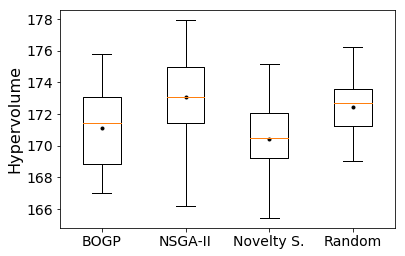

NSGA-II	is	 statistically significantly different than BOGP (ttest)
NSGA-II	is	 statistically significantly different than BOGP (wilcoxon)
Novelty S.	is not	 statistically significantly different than BOGP (ttest)
Novelty S.	is not	 statistically significantly different than BOGP (wilcoxon)
Novelty S.	is	 statistically significantly different than NSGA-II (ttest)
Novelty S.	is	 statistically significantly different than NSGA-II (wilcoxon)
Random	is	 statistically significantly different than BOGP (ttest)
Random	is not	 statistically significantly different than BOGP (wilcoxon)
Random	is not	 statistically significantly different than NSGA-II (ttest)
Random	is not	 statistically significantly different than NSGA-II (wilcoxon)
Random	is	 statistically significantly different than Novelty S. (ttest)
Random	is	 statistically significantly different than Novelty S. (wilcoxon)


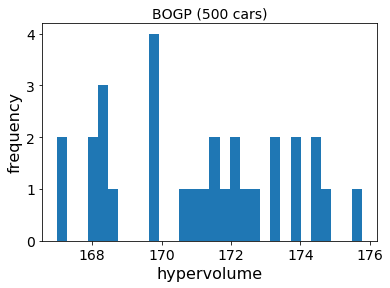

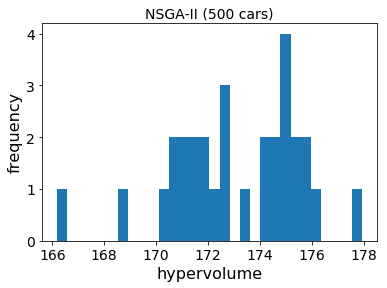

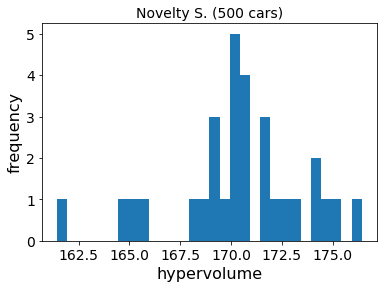

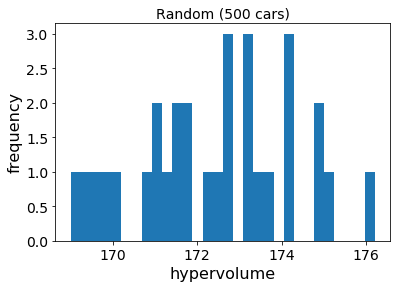

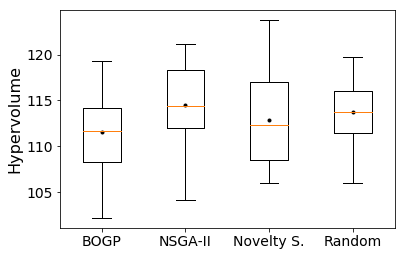

NSGA-II	is	 statistically significantly different than BOGP (ttest)
NSGA-II	is	 statistically significantly different than BOGP (wilcoxon)
Novelty S.	is not	 statistically significantly different than BOGP (ttest)
Novelty S.	is not	 statistically significantly different than BOGP (wilcoxon)
Novelty S.	is not	 statistically significantly different than NSGA-II (ttest)
Novelty S.	is not	 statistically significantly different than NSGA-II (wilcoxon)
Random	is	 statistically significantly different than BOGP (ttest)
Random	is	 statistically significantly different than BOGP (wilcoxon)
Random	is not	 statistically significantly different than NSGA-II (ttest)
Random	is not	 statistically significantly different than NSGA-II (wilcoxon)
Random	is not	 statistically significantly different than Novelty S. (ttest)
Random	is not	 statistically significantly different than Novelty S. (wilcoxon)


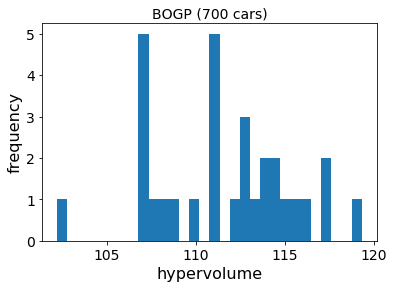

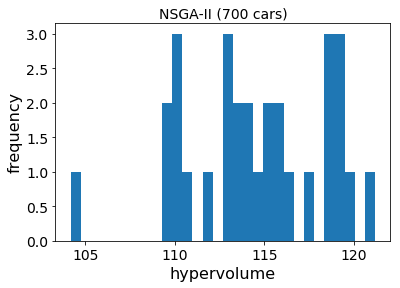

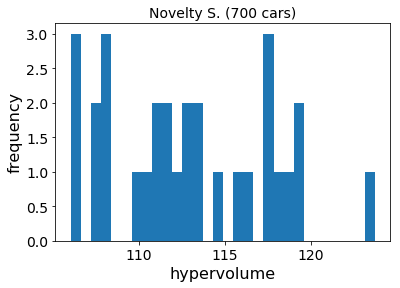

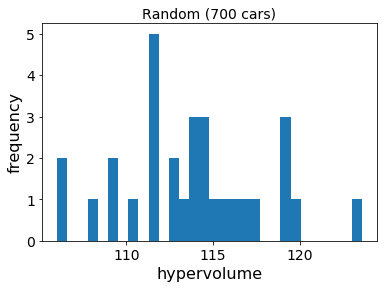

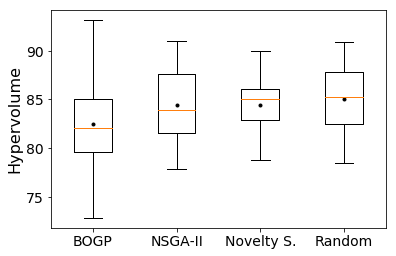

NSGA-II	is not	 statistically significantly different than BOGP (ttest)
NSGA-II	is not	 statistically significantly different than BOGP (wilcoxon)
Novelty S.	is not	 statistically significantly different than BOGP (ttest)
Novelty S.	is not	 statistically significantly different than BOGP (wilcoxon)
Novelty S.	is not	 statistically significantly different than NSGA-II (ttest)
Novelty S.	is not	 statistically significantly different than NSGA-II (wilcoxon)
Random	is	 statistically significantly different than BOGP (ttest)
Random	is	 statistically significantly different than BOGP (wilcoxon)
Random	is not	 statistically significantly different than NSGA-II (ttest)
Random	is not	 statistically significantly different than NSGA-II (wilcoxon)
Random	is not	 statistically significantly different than Novelty S. (ttest)
Random	is not	 statistically significantly different than Novelty S. (wilcoxon)


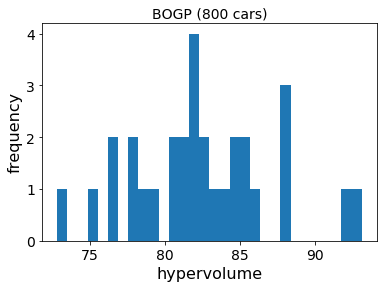

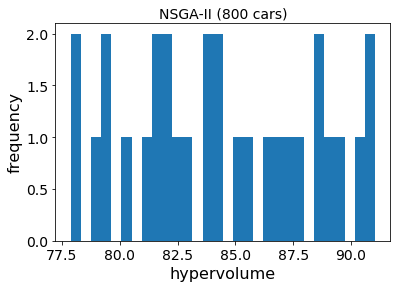

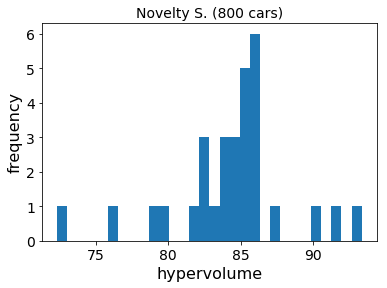

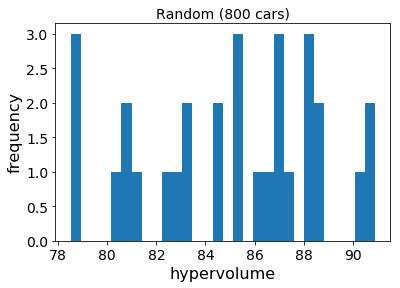

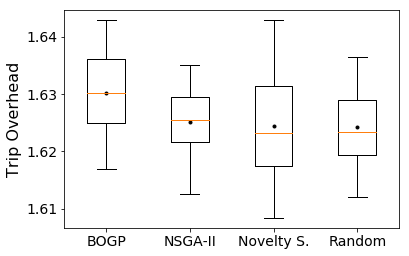

Trip Overhead:
NSGA-II	is	 statistically significantly different than BOGP (ttest)
NSGA-II	is	 statistically significantly different than BOGP (wilcoxon)
Novelty S.	is	 statistically significantly different than BOGP (ttest)
Novelty S.	is	 statistically significantly different than BOGP (wilcoxon)
Novelty S.	is not	 statistically significantly different than NSGA-II (ttest)
Novelty S.	is not	 statistically significantly different than NSGA-II (wilcoxon)
Random	is	 statistically significantly different than BOGP (ttest)
Random	is	 statistically significantly different than BOGP (wilcoxon)
Random	is not	 statistically significantly different than NSGA-II (ttest)
Random	is not	 statistically significantly different than NSGA-II (wilcoxon)
Random	is not	 statistically significantly different than Novelty S. (ttest)
Random	is not	 statistically significantly different than Novelty S. (wilcoxon)


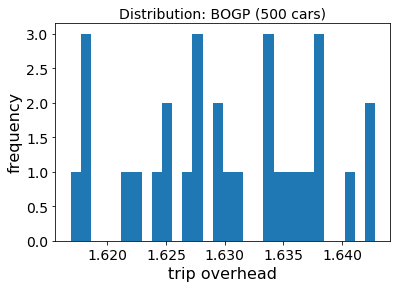

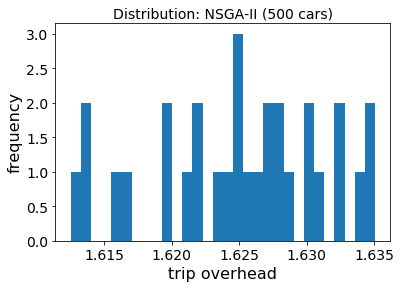

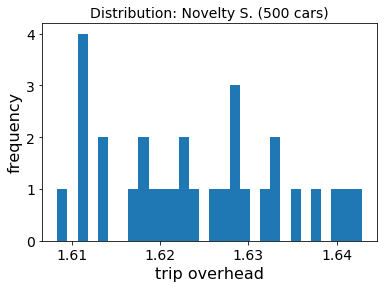

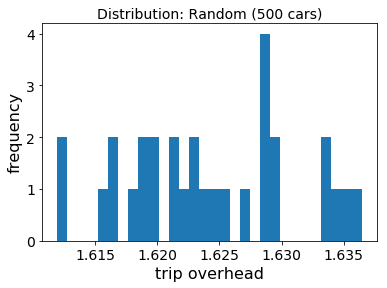

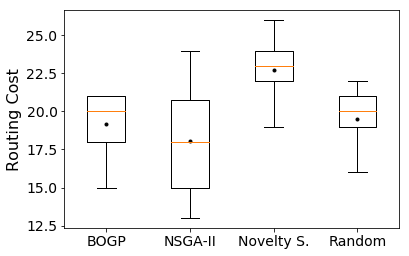

Routing Cost:
NSGA-II	is not	 statistically significantly different than BOGP (ttest)
NSGA-II	is not	 statistically significantly different than BOGP (wilcoxon)
Novelty S.	is	 statistically significantly different than BOGP (ttest)
Novelty S.	is	 statistically significantly different than BOGP (wilcoxon)
Novelty S.	is	 statistically significantly different than NSGA-II (ttest)
Novelty S.	is	 statistically significantly different than NSGA-II (wilcoxon)
Random	is not	 statistically significantly different than BOGP (ttest)
Random	is not	 statistically significantly different than BOGP (wilcoxon)
Random	is	 statistically significantly different than NSGA-II (ttest)
Random	is	 statistically significantly different than NSGA-II (wilcoxon)
Random	is	 statistically significantly different than Novelty S. (ttest)
Random	is	 statistically significantly different than Novelty S. (wilcoxon)


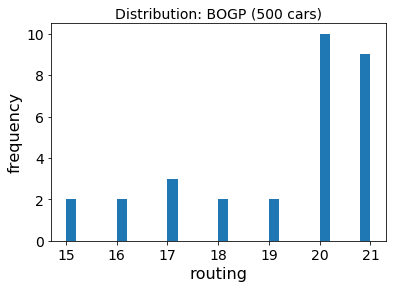

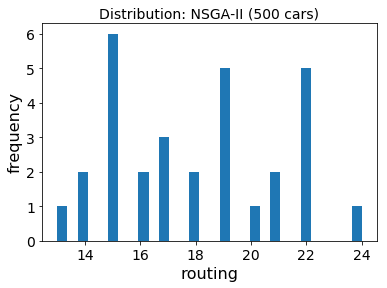

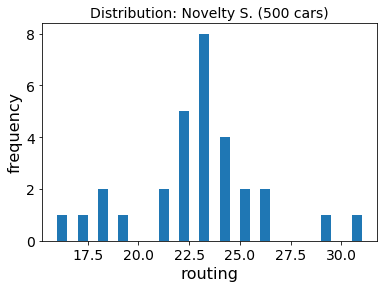

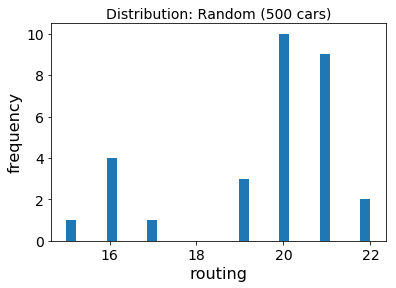

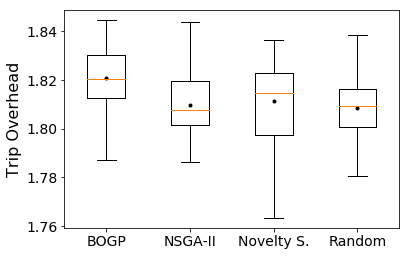

Trip Overhead:
NSGA-II	is	 statistically significantly different than BOGP (ttest)
NSGA-II	is	 statistically significantly different than BOGP (wilcoxon)
Novelty S.	is	 statistically significantly different than BOGP (ttest)
Novelty S.	is	 statistically significantly different than BOGP (wilcoxon)
Novelty S.	is not	 statistically significantly different than NSGA-II (ttest)
Novelty S.	is not	 statistically significantly different than NSGA-II (wilcoxon)
Random	is	 statistically significantly different than BOGP (ttest)
Random	is	 statistically significantly different than BOGP (wilcoxon)
Random	is not	 statistically significantly different than NSGA-II (ttest)
Random	is not	 statistically significantly different than NSGA-II (wilcoxon)
Random	is not	 statistically significantly different than Novelty S. (ttest)
Random	is not	 statistically significantly different than Novelty S. (wilcoxon)


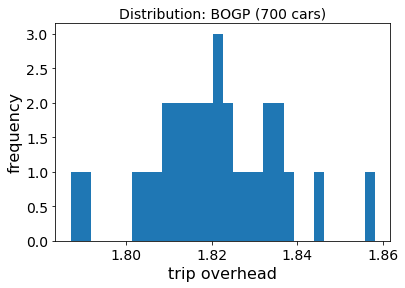

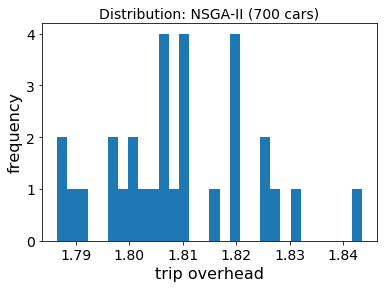

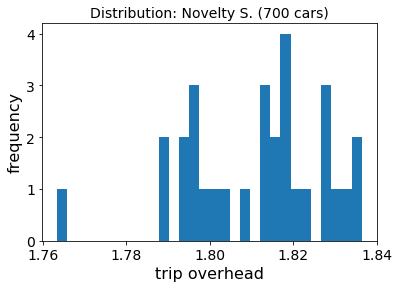

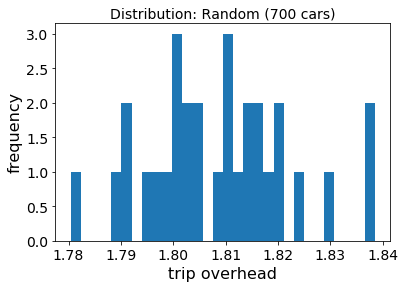

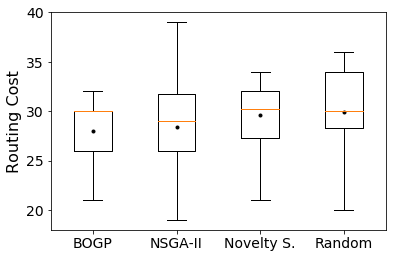

Routing Cost:
NSGA-II	is not	 statistically significantly different than BOGP (ttest)
NSGA-II	is not	 statistically significantly different than BOGP (wilcoxon)
Novelty S.	is not	 statistically significantly different than BOGP (ttest)
Novelty S.	is not	 statistically significantly different than BOGP (wilcoxon)
Novelty S.	is not	 statistically significantly different than NSGA-II (ttest)
Novelty S.	is not	 statistically significantly different than NSGA-II (wilcoxon)
Random	is not	 statistically significantly different than BOGP (ttest)
Random	is	 statistically significantly different than BOGP (wilcoxon)
Random	is not	 statistically significantly different than NSGA-II (ttest)
Random	is not	 statistically significantly different than NSGA-II (wilcoxon)
Random	is not	 statistically significantly different than Novelty S. (ttest)
Random	is not	 statistically significantly different than Novelty S. (wilcoxon)


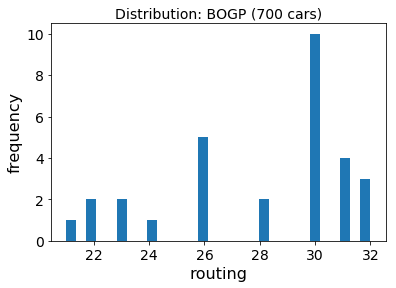

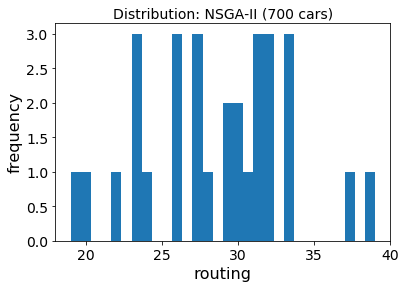

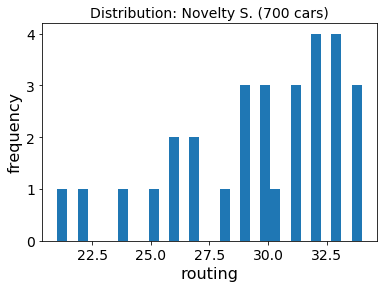

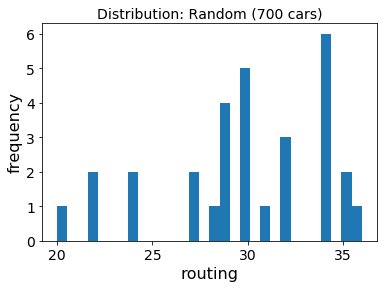

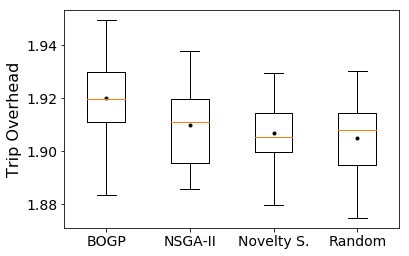

Trip Overhead:
NSGA-II	is	 statistically significantly different than BOGP (ttest)
NSGA-II	is not	 statistically significantly different than BOGP (wilcoxon)
Novelty S.	is	 statistically significantly different than BOGP (ttest)
Novelty S.	is	 statistically significantly different than BOGP (wilcoxon)
Novelty S.	is not	 statistically significantly different than NSGA-II (ttest)
Novelty S.	is not	 statistically significantly different than NSGA-II (wilcoxon)
Random	is	 statistically significantly different than BOGP (ttest)
Random	is	 statistically significantly different than BOGP (wilcoxon)
Random	is not	 statistically significantly different than NSGA-II (ttest)
Random	is not	 statistically significantly different than NSGA-II (wilcoxon)
Random	is not	 statistically significantly different than Novelty S. (ttest)
Random	is not	 statistically significantly different than Novelty S. (wilcoxon)


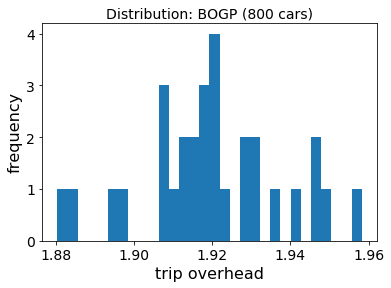

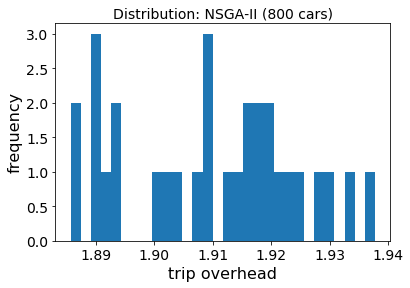

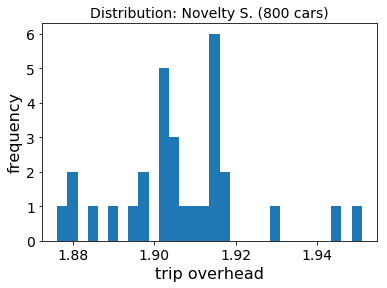

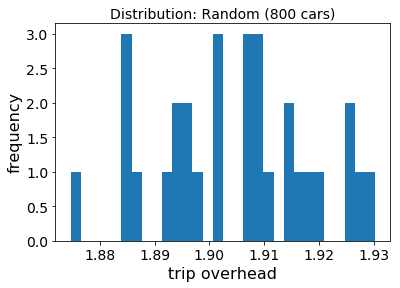

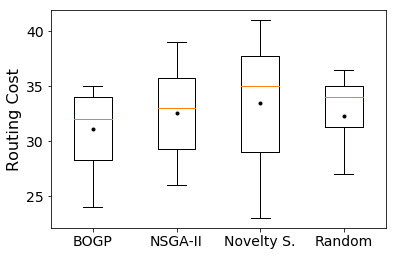

Routing Cost:
NSGA-II	is not	 statistically significantly different than BOGP (ttest)
NSGA-II	is not	 statistically significantly different than BOGP (wilcoxon)
Novelty S.	is	 statistically significantly different than BOGP (ttest)
Novelty S.	is not	 statistically significantly different than BOGP (wilcoxon)
Novelty S.	is not	 statistically significantly different than NSGA-II (ttest)
Novelty S.	is not	 statistically significantly different than NSGA-II (wilcoxon)
Random	is not	 statistically significantly different than BOGP (ttest)
Random	is not	 statistically significantly different than BOGP (wilcoxon)
Random	is not	 statistically significantly different than NSGA-II (ttest)
Random	is not	 statistically significantly different than NSGA-II (wilcoxon)
Random	is not	 statistically significantly different than Novelty S. (ttest)
Random	is not	 statistically significantly different than Novelty S. (wilcoxon)


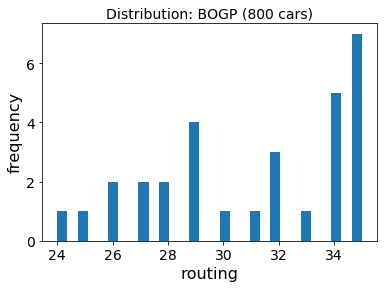

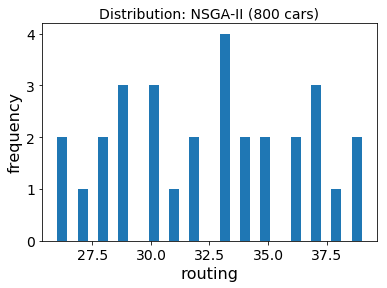

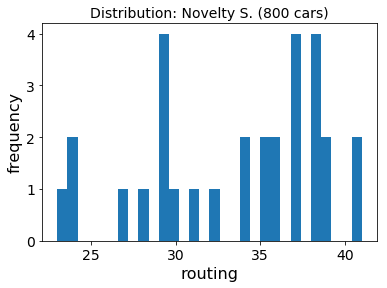

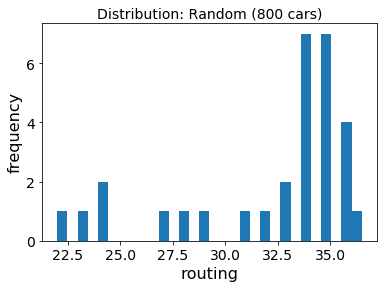

BOGP - final mean hv: 171.109064017
NSGA-II - final mean hv: 173.089805729
Novelty Search - final mean hv: 170.443933347
Random - final mean hv: 172.416133756


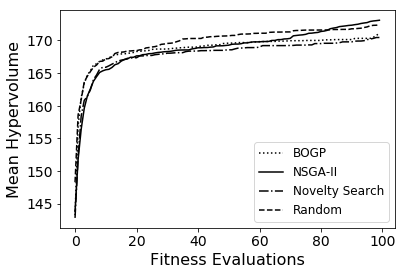

BOGP - final mean hv: 111.62335139
NSGA-II - final mean hv: 114.556311364
Novelty Search - final mean hv: 112.905383098
Random - final mean hv: 113.774266129


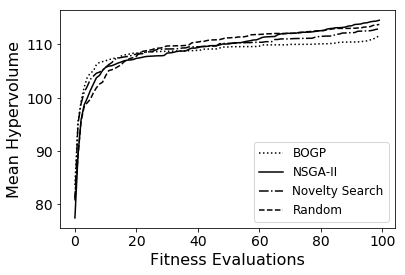

BOGP - final mean hv: 82.4266888081
NSGA-II - final mean hv: 84.3858894969
Novelty Search - final mean hv: 84.4170410117
Random - final mean hv: 85.002377777


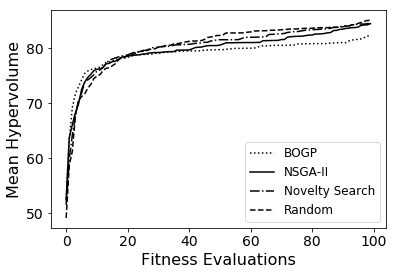

In [11]:
from scipy import stats

reference_point = [worst_overhead, worst_routing]
hyperVolume = HyperVolume(reference_point)

'''
Computes the hypervolumes for all pareto fronts
'''
def compute_hvs(pfronts):
    hvs = []
    for pfront in pfronts:
        pfront_values = [[get_overhead(el), get_routing(el)] for el in pfront]
        hv = hyperVolume.compute(pfront_values)
        hvs.append(hv)       
    return hvs


'''
Computes the average hypervolume for all pareto fronts
'''
def compute_avg_hv(pfronts):
    hvs = compute_hvs(pfronts)        
    return np.mean(hvs)


'''
Computes the median hypervolume for all pareto fronts
'''
def compute_median_hv(pfronts, plotting=False):
    hvs = compute_hvs(pfronts)       
    return np.median(hvs)


'''
Computes the average of the overhead and routing over all pareto fronts of the all runs
'''
def compute_avg_objectives(pfronts):
    overheads, routings = get_objectives_for_each_pfront(pfronts)
    return np.mean(overheads), np.mean(routings)

'''
Computes the median of the overhead and routing over all pareto fronts of the all runs
'''
def compute_median_objectives(pfronts):
    overheads, routings = get_objectives_for_each_pfront(pfronts)
    return np.median(overheads), np.median(routings)


def get_objectives_for_each_pfront(pfronts, plotting=False):
    overheads = []
    routings = []
    # for each run/seed
    
    for pfront in pfronts:
        overheads_single_run = [get_overhead(el) for el in pfront]
        overheads.append(np.min(overheads_single_run))
        routings_single_run = [get_routing(el) for el in pfront]
        routings.append(np.min(routings_single_run))
    
    return overheads, routings


'''
List of lists, one for each run containing how the hypervolume evolves with each fitness evaluation.
'''
def compute_hv_over_evals(rtx_runs, run_to_all_individuals, opt_method):
    # set iterations
    set_iterations(opt_method)
    
    hv_series_of_all_runs = []
    for rtx_run in rtx_runs:
        rtx_run_id = rtx_run["id"]
        # get all individuals of the run
        all_individuals = run_to_all_individuals.get(rtx_run_id, None)
        if all_individuals is None:
            # print("No documents for run " + str(rtx_run_id))
            break
       
        # debug_msg = ""
        hv_series = []          
        current_pareto_front = []
        for i in range(iterations):
            new_inds = [el for el in all_individuals if el["iteration"] == i]
            if not isinstance(new_inds, (list,)):
                new_inds = [new_inds]
            for j in range(len(new_inds)):
                # new_ind is a list with one element
                new_ind = [el for el in new_inds if el["individual"] == j]
                if len(new_ind) > 1:
                    print("ERROR: More than one individual with the same number within the same iteration.")
                # debug_msg = debug_msg 
                #   + "(" + str(new_ind[0]["iteration"]) + ", " + str(new_ind[0]["individual"]) + ")"
                current_pareto_front.append(new_ind[0])
                current_pareto_front = get_pareto_front(current_pareto_front)
                current_pareto_front_values = [[get_overhead(el), get_routing(el)] 
                                               for el in current_pareto_front]
                hv = hyperVolume.compute(current_pareto_front_values)
                hv_series.append(hv)
        # print(debug_msg)
        hv_series_of_all_runs.append(hv_series)
    return hv_series_of_all_runs
    

'''
Plots the evolution of the hypervolume of the methods over fitness evaluations. 
The hypervolume plotted is the mean hypervolume over the runs for each method.
'''
def plot_hypervolume_evolution(random_rtx_runs, random_run_to_all_individuals,
                               nsga2_rtx_runs, nsga2_run_to_all_individuals,
                               novelty_rtx_runs, novelty_run_to_all_individuals,
                               mlr_rtx_runs, mlr_run_to_all_individuals, cars_number):
    methods = ["BOGP", "NSGA-II", "Novelty Search", "Random"]
    linestyles = [':', '-', '-.', '--']
    
    mlr_hv_series = compute_hv_over_evals(mlr_rtx_runs, mlr_run_to_all_individuals, methods[0])
    nsga2_hv_series = compute_hv_over_evals(nsga2_rtx_runs, nsga2_run_to_all_individuals, methods[1])
    novelty_hv_series = compute_hv_over_evals(novelty_rtx_runs, novelty_run_to_all_individuals, methods[2])
    random_hv_series = compute_hv_over_evals(random_rtx_runs, random_run_to_all_individuals, methods[3])
    
    all_hv_series = [mlr_hv_series, nsga2_hv_series, novelty_hv_series, random_hv_series]
    
    fig, axes = plt.subplots()
    # fig.suptitle("Evolution of the Mean Hypervolume (" + str(cars_number) + " cars)", fontsize=16)    
    plt.ylabel('Mean Hypervolume')
    plt.xlabel('Fitness Evaluations')
    
    for i in range(len(methods)):
        method = methods[i]
        hv_series = all_hv_series[i]
        a = np.array(hv_series)   
        plot_data = np.mean(a, axis=0)
        print(method + " - final mean hv: " + str(plot_data[len(plot_data)-1]))
        plt.plot(range(len(plot_data)), plot_data, color='black', linestyle=linestyles[i], label=method)
     
    pylab.legend(loc='best')
    plt.show()

    
def plot_hypervolume_boxplots(random_pfronts, nsga2_pfronts, novelty_pfronts, mlr_pfronts, cars_number):
    hvs_random = compute_hvs(random_pfronts)
    hvs_nsga2 = compute_hvs(nsga2_pfronts)
    hvs_novelty = compute_hvs(novelty_pfronts)
    hvs_mlr = compute_hvs(mlr_pfronts)

    hvs = [hvs_mlr, hvs_nsga2, hvs_novelty, hvs_random]
    hvs_names = ["BOGP", "NSGA-II", "Novelty S.", "Random"]
    hvs_labels = range(1,5)

    fig,ax = plt.subplots()
    # plt.title(str(cars_number) + " cars")
    ax.boxplot(hvs, 0, '', positions=hvs_labels)
    for i in range(len(hvs)):
        ax.plot(hvs_labels[i], np.mean(hvs[i]), ".", label='mean', color='black', linestyle=':')
    plt.xticks(hvs_labels, hvs_names) 
    plt.ylabel('Hypervolume')
    plt.show() 
    
    # statistical tests
    run_ttest(hvs, hvs_names)
    
    # distributions
    for i in range(len(hvs)):
        fig,ax = plt.subplots()
        plt.hist(hvs[i], bins=30)  
        plt.title(str(hvs_names[i]) + " (" + str(cars_number) + " cars)")
        plt.ylabel('frequency')
        plt.xlabel('hypervolume')
        plt.show() 

    
def plot_objectives_boxplots(random_pfronts, nsga2_pfronts, novelty_pfronts, mlr_pfronts, cars_number):
    overheads_random, routings_random = get_objectives_for_each_pfront(random_pfronts) 
    overheads_nsga2, routings_nsga2 = get_objectives_for_each_pfront(nsga2_pfronts) 
    overheads_novelty, routings_novelty = get_objectives_for_each_pfront(novelty_pfronts)  
    overheads_mlr, routings_mlr = get_objectives_for_each_pfront(mlr_pfronts)
        
    overheads = [overheads_mlr, overheads_nsga2, overheads_novelty, overheads_random]
    routings  = [routings_mlr, routings_nsga2, routings_novelty, routings_random]
    names = ["BOGP", "NSGA-II", "Novelty S.", "Random"]
    labels = range(1,5)
    
    # Trip overhead
    fig,ax = plt.subplots()
    # plt.title(str(cars_number) + " cars")
    ax.boxplot(overheads, 0, '', positions=labels)
    for i in range(len(overheads)):
        ax.plot(labels[i], np.mean(overheads[i]), ".", label='mean', color='black', linestyle=':')
    plt.xticks(labels, names) 
    plt.ylabel('Trip Overhead')
    plt.show()
    
    # statistical test #############
    print("Trip Overhead:")
    run_ttest(overheads, names)
    
    # distributions
    for i in range(len(overheads)):
        fig,ax = plt.subplots()
        plt.hist(overheads[i], bins=30)  
        plt.title("Distribution: " + str(names[i]) + " (" + str(cars_number) + " cars)")
        plt.ylabel('frequency')
        plt.xlabel('trip overhead')
    plt.show()    
    
    # Routing Cost
    fig,ax = plt.subplots()
    # plt.title(str(cars_number) + " cars")
    ax.boxplot(routings, 0, '', positions=labels)
    for i in range(len(routings)):
        ax.plot(labels[i], np.mean(routings[i]), ".", label='mean', color='black', linestyle=':')
    plt.xticks(labels, names) 
    plt.ylabel('Routing Cost')
    plt.show() 
        
    # statistical test #############
    print("Routing Cost:")
    run_ttest(routings, names)
    
     # distributions
    for i in range(len(routings)):
        fig,ax = plt.subplots()
        plt.hist(routings[i], bins=30)  
        plt.title("Distribution: " + str(names[i]) + " (" + str(cars_number) + " cars)")
        plt.ylabel('frequency')
        plt.xlabel('routing')
    plt.show() 
    

def run_ttest(dataXXX, names):
    alpha = 0.05
    for i in range(len(dataXXX)):
        data_first = dataXXX[i]
        name_first = names[i]
        for j in range(len(names)):
            if j == i:
                break
            data_second = dataXXX[j]
            name_second = names[j]
            statistic, pvalue = stats.ttest_ind(data_first, data_second, equal_var = False)
            statistic2, pvalue2 = stats.wilcoxon(data_first, data_second)
            
            different_averages = bool(pvalue <= alpha)
            is_is_not = "\tis\t" if different_averages else "\tis not\t"
            print(name_first + is_is_not 
                  + " statistically significantly different than "+ name_second + " (ttest)")
            
            different_averages2 = bool(pvalue2 <= alpha)
            is_is_not2 = "\tis\t" if different_averages2 else "\tis not\t"
            print(name_first + is_is_not2 
                  + " statistically significantly different than "+ name_second + " (wilcoxon)")


            
def check_avg(pfronts, name):
    avg_hv = compute_avg_hv(pfronts)
    median_hv = compute_median_hv(pfronts)
    
    avg_best_objectives = compute_avg_objectives(pfronts)
    avg_best_overhead = avg_best_objectives[0]
    avg_best_routing = avg_best_objectives[1]
    
    med_best_objectives = compute_median_objectives(pfronts)
    med_best_overhead = med_best_objectives[0]
    med_best_routing = med_best_objectives[1]
    
    tt = "\t\t" if name == "BOGP" else "\t"
        
        
    print(name + " ("+str(len(pfronts))+" runs):" + tt
          + str(avg_best_overhead) + "\t| " + str(med_best_overhead) + "\t| " 
          + str(avg_best_routing) + "\t| " + str(med_best_routing) + "\t| " 
          + str(avg_hv) + "\t|" + str(median_hv) + "\t| ")
    

    
SMALL_SIZE = 12
MEDIUM_SIZE = 14
BIGGER_SIZE = 16

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

print("Iterations considered: " + str(iterations))
print("Average Overhead (Best of each run) | Median Overhead (Best of each run)" 
      +" | Average Routing (Best of each run) | Median Routing (Best of each run)" 
      +" |Average Hypervolume | Median Hypervolume" )

print("500 cars")
check_avg(mlr_500_pfronts, "BOGP")
check_avg(nsga2_500_pfronts, "NSGA-II")
check_avg(novelty_500_pfronts, "Novel")
check_avg(random_500_pfronts, "Random")

print("700 cars")
check_avg(mlr_700_pfronts, "BOGP")
check_avg(nsga2_700_pfronts, "NSGA-II")
check_avg(novelty_700_pfronts, "Novel")
check_avg(random_700_pfronts, "Random")

print("800 cars")
check_avg(mlr_800_pfronts, "BOGP")
check_avg(nsga2_800_pfronts, "NSGA-II")
check_avg(novelty_800_pfronts, "Novel")
check_avg(random_800_pfronts, "Random")


# Hypervolume Boxplots ==========
plot_hypervolume_boxplots(random_500_pfronts, nsga2_500_pfronts, novelty_500_pfronts, mlr_500_pfronts, 500)
plot_hypervolume_boxplots(random_700_pfronts, nsga2_700_pfronts, novelty_700_pfronts, mlr_700_pfronts, 700)
plot_hypervolume_boxplots(random_800_pfronts, nsga2_800_pfronts, novelty_800_pfronts, mlr_800_pfronts, 800)

# Objectives Boxplots ==========
plot_objectives_boxplots(random_500_pfronts, nsga2_500_pfronts, novelty_500_pfronts, mlr_500_pfronts, 500)
plot_objectives_boxplots(random_700_pfronts, nsga2_700_pfronts, novelty_700_pfronts, mlr_700_pfronts, 700)
plot_objectives_boxplots(random_800_pfronts, nsga2_800_pfronts, novelty_800_pfronts, mlr_800_pfronts, 800)

# Hypervolume Evolution ==========
plot_hypervolume_evolution(random_rtx_runs_500, random_run_inds_500, 
                           nsga2_rtx_runs_500, nsga2_run_inds_500,
                           novelty_rtx_runs_500, novelty_run_inds_500, 
                           mlr_rtx_runs_500, mlr_run_inds_500, 500)

plot_hypervolume_evolution(random_rtx_runs_700, random_run_inds_700,
                           nsga2_rtx_runs_700, nsga2_run_inds_700,
                           novelty_rtx_runs_700, novelty_run_inds_700,
                           mlr_rtx_runs_700, mlr_run_inds_700, 700)

plot_hypervolume_evolution(random_rtx_runs_800, random_run_inds_800,
                           nsga2_rtx_runs_800, nsga2_run_inds_800,
                           novelty_rtx_runs_800, novelty_run_inds_800,
                           mlr_rtx_runs_800, mlr_run_inds_800, 800)

### 